In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [4]:
df = pd.read_csv("StudentsPerformance.csv")

In [5]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
df['parental level of education'] = df['parental level of education'].replace(['some college','some high school'],['college','high school'])

df["average score"] = (df["math score"] + df["reading score"] + df["writing score"])/3
df["average score"] = df["average score"].astype(int)

In [7]:
lb_make = LabelEncoder()
df["gender_cat"] = lb_make.fit_transform(df["gender"])
df["race/ethnicity_cat"] = lb_make.fit_transform(df["race/ethnicity"])
df["parental level of education_cat"] = lb_make.fit_transform(df["parental level of education"])
df["lunch_cat"] = lb_make.fit_transform(df["lunch"])
df["test preparation course_cat"] = lb_make.fit_transform(df["test preparation course"])

df['math score_cat'] = df['math score']
df['reading score_cat'] = df['reading score']
df['writing score_cat'] = df['writing score']
df['average score_cat'] = df['average score']

df['average score_cat'] = df['average score_cat'].apply(lambda x: 90 if x >= 70 else 50)
df['math score_cat'] = df['math score_cat'].apply(lambda x: 90 if x >= 70 else 50)
df['reading score_cat'] = df['reading score_cat'].apply(lambda x: 90 if x >= 70 else 50)
df['writing score_cat'] = df['writing score_cat'].apply(lambda x: 90 if x >= 70 else 50)

df['average score_cat'] = df['average score_cat'].replace([90,50],[1,0])
df['reading score_cat'] = df['reading score_cat'].replace([90,50],[1,0])
df['writing score_cat'] = df['writing score_cat'].replace([90,50],[1,0])
df['math score_cat'] = df['math score_cat'].replace([90,50],[1,0])

In [8]:
df[["gender","race/ethnicity","parental level of education","lunch","test preparation course","math score","reading score","writing score","average score"]].head(11)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,college,standard,none,76,78,75,76
5,female,group B,associate's degree,standard,none,71,83,78,77
6,female,group B,college,standard,completed,88,95,92,91
7,male,group B,college,free/reduced,none,40,43,39,40
8,male,group D,high school,free/reduced,completed,64,64,67,65
9,female,group B,high school,free/reduced,none,38,60,50,49


In [9]:
df[["gender_cat","race/ethnicity_cat","parental level of education_cat","lunch_cat","test preparation course_cat","math score_cat","reading score_cat","writing score_cat","average score_cat"]].head(11)

,gender_cat,race/ethnicity_cat,parental level of education_cat,lunch_cat,test preparation course_cat,math score_cat,reading score_cat,writing score_cat,average score_cat
0,0,1,1,1,1,1,1,1,1
1,0,2,2,1,0,0,1,1,1
2,0,1,4,1,1,1,1,1,1
3,1,0,0,0,1,0,0,0,0
4,1,2,2,1,1,1,1,1,1
5,0,1,0,1,1,1,1,1,1
6,0,1,2,1,0,1,1,1,1
7,1,1,2,0,1,0,0,0,0
8,1,3,3,0,0,0,0,0,0
9,0,1,3,0,1,0,0,0,0


In [10]:
df_cat = df[['gender_cat','race/ethnicity_cat','parental level of education_cat','lunch_cat','test preparation course_cat','math score_cat','reading score_cat', 'writing score_cat','average score_cat']]

In [11]:
corr = df_cat.corr()
corr.style.background_gradient(cmap='coolwarm')

,gender_cat,race/ethnicity_cat,parental level of education_cat,lunch_cat,test preparation course_cat,math score_cat,reading score_cat,writing score_cat,average score_cat
gender_cat,1.000000,-0.001502,0.003559,0.021372,-0.006028,0.137838,-0.209270,-0.287047,-0.121439
race/ethnicity_cat,-0.001502,1.000000,-0.046299,0.046563,-0.017508,0.196669,0.139660,0.157247,0.178943
parental level of education_cat,0.003559,-0.046299,1.000000,-0.009044,0.020203,-0.046100,-0.084460,-0.091787,-0.068479
lunch_cat,0.021372,0.046563,-0.009044,1.000000,0.017044,0.247364,0.188627,0.190616,0.222037
test preparation course_cat,-0.006028,-0.017508,0.020203,0.017044,1.000000,-0.125489,-0.210103,-0.262627,-0.224689
math score_cat,0.137838,0.196669,-0.046100,0.247364,-0.125489,1.000000,0.566380,0.537094,0.707230
reading score_cat,-0.209270,0.139660,-0.084460,0.188627,-0.210103,0.566380,1.000000,0.809041,0.825189
writing score_cat,-0.287047,0.157247,-0.091787,0.190616,-0.262627,0.537094,0.809041,1.000000,0.805102
average score_cat,-0.121439,0.178943,-0.068479,0.222037,-0.224689,0.707230,0.825189,0.805102,1.000000


In [12]:
availablePredictors = df_cat[['gender_cat','race/ethnicity_cat','parental level of education_cat','lunch_cat','test preparation course_cat']]
availableLabel = df_cat[['math score_cat','reading score_cat', 'writing score_cat','average score_cat']]

In [13]:
availablePredictors

,gender_cat,race/ethnicity_cat,parental level of education_cat,lunch_cat,test preparation course_cat
0,0,1,1,1,1
1,0,2,2,1,0
2,0,1,4,1,1
3,1,0,0,0,1
4,1,2,2,1,1
...,...,...,...,...,...
995,0,4,4,1,0
996,1,2,3,0,1
997,0,2,3,0,0
998,0,3,2,1,0


In [14]:
availableLabel

,math score_cat,reading score_cat,writing score_cat,average score_cat
0,1,1,1,1
1,0,1,1,1
2,1,1,1,1
3,0,0,0,0
4,1,1,1,1
...,...,...,...,...
995,1,1,1,1
996,0,0,0,0
997,0,1,0,0
998,0,1,1,1


In [64]:
# Random Forest - Average

Predictor = availablePredictors.drop(['parental level of education_cat'],axis = 1)
Label = availableLabel["average score_cat"]

RAprecisionArr = []
RArecallArr = []
RAf1Arr = []
RAaccuracyArr = []

for i in range (100):

  X_train, X_test, y_train, y_test = train_test_split(Predictor, Label, test_size = 0.3)

  randomForest = RandomForestClassifier(max_depth=3)
  randomForest.fit(X_train, y_train)

  y_pred = randomForest.predict(X_test)

  precision = precision_score(y_test,y_pred, average = 'weighted', zero_division = 1)
  RAprecisionArr.append(precision)
  
  accuracy = accuracy_score(y_test,y_pred)
  RAaccuracyArr.append(accuracy)

  recall = recall_score(y_test,y_pred, average = 'weighted')
  RArecallArr.append(recall)

  f1 = f1_score(y_test,y_pred, average='weighted')
  RAf1Arr.append(f1)

print("Random Forest - average")
print ("Precision Average : ", np.mean(RAprecisionArr))
print ("Accuracy Average : ", np.mean(RAaccuracyArr))
print ("Recall Average : ", np.mean(RArecallArr))
print ("F1 Average : ", np.mean(RAf1Arr))
print ()


Random Forest - average
Precision Average :  0.6415292657415037
Accuracy Average :  0.6389
Recall Average :  0.6389
F1 Average :  0.6353887839572667



Random Forest - average
Precision Average :  0.6415292657415037
Precision Range   :  0.5855324283559576 - 0.7171029387669988
Accuracy Average  :  0.6389
Accuracy Range    :  0.5833333333333334 - 0.69
Recall Average    :  0.6389
Recall Range      :  0.5833333333333334 - 0.69
F1 Average        :  0.6353887839572667
F1 Range          :  0.5723921326330964 - 0.6904583606630278



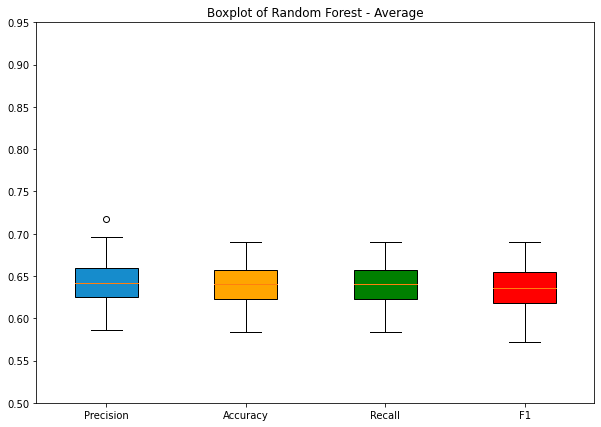

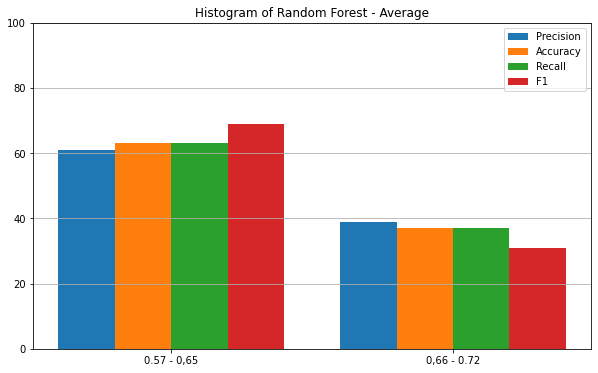

In [65]:
 # Visualization

print("Random Forest - average")
print ("Precision Average : ", np.mean(RAprecisionArr))
print ("Precision Range   : ", np.min(RAprecisionArr), '-', np.max(RAprecisionArr))
print ("Accuracy Average  : ", np.mean(RAaccuracyArr))
print ("Accuracy Range    : ", np.min(RAaccuracyArr), '-', np.max(RAaccuracyArr))
print ("Recall Average    : ", np.mean(RArecallArr))
print ("Recall Range      : ", np.min(RArecallArr), '-', np.max(RArecallArr))
print ("F1 Average        : ", np.mean(RAf1Arr))
print ("F1 Range          : ", np.min(RAf1Arr), '-', np.max(RAf1Arr))
print ()

VizArr = [RAprecisionArr,RAaccuracyArr,RArecallArr,RAf1Arr]
labelXtick_1 = str(np.min(VizArr))[:4] + ' - 0,65'
labelXtick_2 = '0,66 - ' + str(np.max(VizArr)+0.01)[:4]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Random Forest - Average")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Precision', 'Accuracy', 'Recall', 'F1'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 


fig = plt.figure(figsize =(10, 6)) 
plt.hist(VizArr,bins = [0.50,0.65,0.80], label=['Precision', 'Accuracy', 'Recall', 'F1'])
plt.ylim(ymin=0, ymax = 100)
plt.xticks([0.575,0.725],labels=[labelXtick_1,labelXtick_2])
plt.legend()
plt.grid(axis = 'y')
plt.plot()
plt.title(label="Histogram of Random Forest - Average")
plt.show()

In [17]:
# Random Forest - Math

Predictor = availablePredictors.drop(['parental level of education_cat'],axis = 1)
Label = availableLabel["math score_cat"]

RMprecisionArr = []
RMrecallArr = []
RMf1Arr = []
RMaccuracyArr = []

for i in range (100):

  X_train, X_test, y_train, y_test = train_test_split(Predictor, Label, test_size = 0.3)

  randomForest = RandomForestClassifier(max_depth=3)
  randomForest.fit(X_train, y_train)

  y_pred = randomForest.predict(X_test)

  precision = precision_score(y_test,y_pred, average = 'weighted')
  RMprecisionArr.append(precision)

  accuracy = accuracy_score(y_test,y_pred)
  RMaccuracyArr.append(accuracy)

  recall = recall_score(y_test,y_pred, average = 'weighted')
  RMrecallArr.append(recall)

  f1 = f1_score(y_test,y_pred, average='weighted')
  RMf1Arr.append(f1)
  
print("Random Forest - math")
print ("Precision Average : ", np.mean(RMprecisionArr))
print ("Accuracy Average : ", np.mean(RMaccuracyArr))
print ("Recall Average : ", np.mean(RMrecallArr))
print ("F1 Average : ", np.mean(RMf1Arr))
print ()


Random Forest - math
Precision Average :  0.6566915395967073
Accuracy Average :  0.6575333333333333
Recall Average :  0.6575333333333333
F1 Average :  0.6400499619132181



Random Forest - Math
Precision Average :  0.6566915395967073
Precision Range   :  0.5975243664717349 - 0.7180153315985652
Accuracy Average  :  0.6575333333333333
Accuracy Range    :  0.6066666666666667 - 0.7166666666666667
Recall Average    :  0.6575333333333333
Recall Range      :  0.6066666666666667 - 0.7166666666666667
F1 Average        :  0.6400499619132181
F1 Range          :  0.5785333333333332 - 0.704048839200407



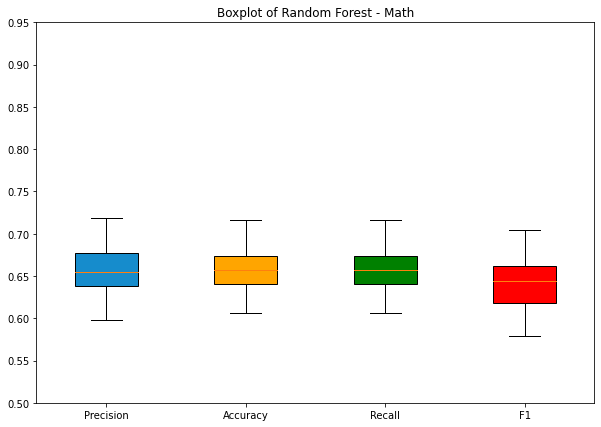

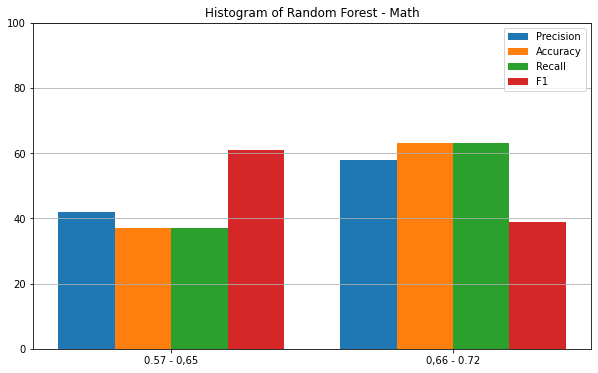

In [18]:
# Visualization

print("Random Forest - Math")
print ("Precision Average : ", np.mean(RMprecisionArr))
print ("Precision Range   : ", np.min(RMprecisionArr), '-', np.max(RMprecisionArr))
print ("Accuracy Average  : ", np.mean(RMaccuracyArr))
print ("Accuracy Range    : ", np.min(RMaccuracyArr), '-', np.max(RMaccuracyArr))
print ("Recall Average    : ", np.mean(RMrecallArr))
print ("Recall Range      : ", np.min(RMrecallArr), '-', np.max(RMrecallArr))
print ("F1 Average        : ", np.mean(RMf1Arr))
print ("F1 Range          : ", np.min(RMf1Arr), '-', np.max(RMf1Arr))
print ()

VizArr = [RMprecisionArr,RMaccuracyArr,RMrecallArr,RMf1Arr]
labelXtick_1 = str(np.min(VizArr))[:4] + ' - 0,65'
labelXtick_2 = '0,66 - ' + str(np.max(VizArr)+0.01)[:4]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Random Forest - Math")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Precision', 'Accuracy', 'Recall', 'F1'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

fig = plt.figure(figsize =(10, 6)) 
plt.hist(VizArr,bins = [0.50,0.65,0.80], label=['Precision', 'Accuracy', 'Recall', 'F1'])
plt.xticks([0.575,0.725],labels=[labelXtick_1,labelXtick_2])
plt.ylim(ymin=0, ymax = 100)
plt.legend()
plt.grid(axis = 'y')
plt.plot()
plt.title(label="Histogram of Random Forest - Math")
plt.show()

In [72]:
# Random Forest - Writing

Predictor = availablePredictors.drop([],axis = 1)
Label = availableLabel["writing score_cat"]

RWprecisionArr = []
RWrecallArr = []
RWf1Arr = []
RWaccuracyArr = []

for i in range (100):

  X_train, X_test, y_train, y_test = train_test_split(Predictor, Label, test_size = 0.3)

  randomForest = RandomForestClassifier(max_depth=3)
  randomForest.fit(X_train, y_train)

  y_pred = randomForest.predict(X_test)

  precision = precision_score(y_test,y_pred, average = 'weighted')
  RWprecisionArr.append(precision)

  accuracy = accuracy_score(y_test,y_pred)
  RWaccuracyArr.append(accuracy)

  recall = recall_score(y_test,y_pred, average = 'weighted')
  RWrecallArr.append(recall)

  f1 = f1_score(y_test,y_pred, average='weighted')
  RWf1Arr.append(f1)
  
print("Random Forest - Writing")
print ("Precision Average : ", np.mean(RWprecisionArr))
print ("Accuracy Average : ", np.mean(RWaccuracyArr))
print ("Recall Average : ", np.mean(RWrecallArr))
print ("F1 Average : ", np.mean(RWf1Arr))
print ()


Random Forest - Writing
Precision Average :  0.6991080300606575
Accuracy Average :  0.6961000000000002
Recall Average :  0.6961000000000002
F1 Average :  0.6958082754261002



Random Forest - Writing
Precision Average :  0.6991080300606575
Precision Range   :  0.6420454545454546 - 0.7564699589944731
Accuracy Average  :  0.6961000000000002
Accuracy Range    :  0.6366666666666667 - 0.7533333333333333
Recall Average    :  0.6961000000000002
Recall Range      :  0.6366666666666667 - 0.7533333333333333
F1 Average        :  0.6958082754261002
F1 Range          :  0.6373733444475317 - 0.7532565891817413



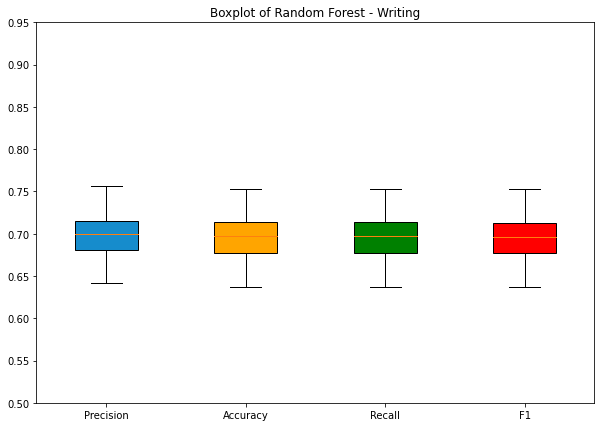

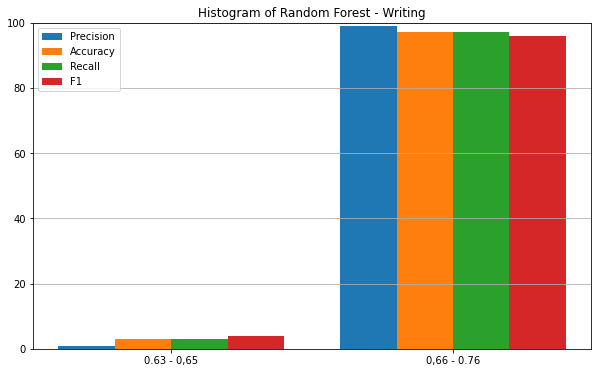

In [73]:
# Visualization

print("Random Forest - Writing")
print ("Precision Average : ", np.mean(RWprecisionArr))
print ("Precision Range   : ", np.min(RWprecisionArr), '-', np.max(RWprecisionArr))
print ("Accuracy Average  : ", np.mean(RWaccuracyArr))
print ("Accuracy Range    : ", np.min(RWaccuracyArr), '-', np.max(RWaccuracyArr))
print ("Recall Average    : ", np.mean(RWrecallArr))
print ("Recall Range      : ", np.min(RWrecallArr), '-', np.max(RWrecallArr))
print ("F1 Average        : ", np.mean(RWf1Arr))
print ("F1 Range          : ", np.min(RWf1Arr), '-', np.max(RWf1Arr))
print ()

VizArr = [RWprecisionArr,RWaccuracyArr,RWrecallArr,RWf1Arr]
labelXtick_1 = str(np.min(VizArr))[:4] + ' - 0,65'
labelXtick_2 = '0,66 - ' + str(np.max(VizArr)+0.01)[:4]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Random Forest - Writing")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Precision', 'Accuracy', 'Recall', 'F1'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

fig = plt.figure(figsize =(10, 6)) 
plt.hist(VizArr,bins = [0.50,0.65,0.80], label=['Precision', 'Accuracy', 'Recall', 'F1'])
plt.xticks([0.575,0.725],labels=[labelXtick_1,labelXtick_2])
plt.ylim(ymin=0, ymax = 100)
plt.legend()
plt.grid(axis = 'y')
plt.plot()
plt.title(label="Histogram of Random Forest - Writing")
plt.show()

In [21]:
# Random Forest - Reading

Predictor = availablePredictors.drop([],axis = 1)
Label = availableLabel["reading score_cat"]

RRprecisionArr = []
RRrecallArr = []
RRf1Arr = []
RRaccuracyArr = []

for i in range (100):

  X_train, X_test, y_train, y_test = train_test_split(Predictor, Label, test_size = 0.3)

  randomForest = RandomForestClassifier(max_depth=3)
  randomForest.fit(X_train, y_train)

  y_pred = randomForest.predict(X_test)

  precision = precision_score(y_test,y_pred, average = 'weighted')
  RRprecisionArr.append(precision)

  accuracy = accuracy_score(y_test,y_pred)
  RRaccuracyArr.append(accuracy)

  recall = recall_score(y_test,y_pred, average = 'weighted')
  RRrecallArr.append(recall)

  f1 = f1_score(y_test,y_pred, average='weighted')
  RRf1Arr.append(f1)
  
print("Random Forest - Reading")
print ("Precision Average : ", np.mean(RRprecisionArr))
print ("Accuracy Average : ", np.mean(RRaccuracyArr))
print ("Recall Average : ", np.mean(RRrecallArr))
print ("F1 Average : ", np.mean(RRf1Arr))
print ()


Random Forest - Reading
Precision Average :  0.6586958167312873
Accuracy Average :  0.6559999999999999
Recall Average :  0.6559999999999999
F1 Average :  0.6555857468157363



Random Forest - Reading
Precision Average :  0.6586958167312873
Precision Range   :  0.5979137591697978 - 0.7103584771392991
Accuracy Average  :  0.6559999999999999
Accuracy Range    :  0.5933333333333334 - 0.71
Recall Average    :  0.6559999999999999
Recall Range      :  0.5933333333333334 - 0.7100000000000001
F1 Average        :  0.6555857468157363
F1 Range          :  0.5929717875770509 - 0.7089624154600208



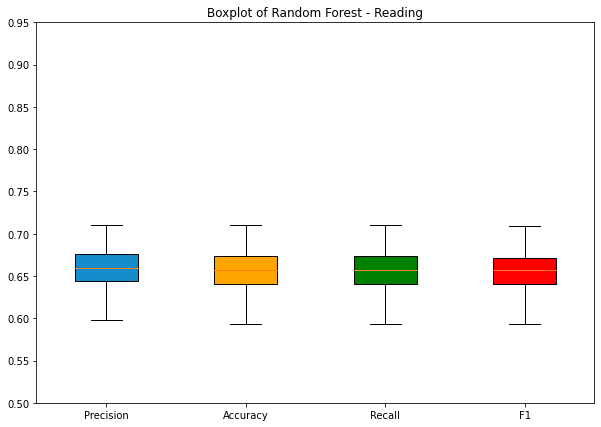

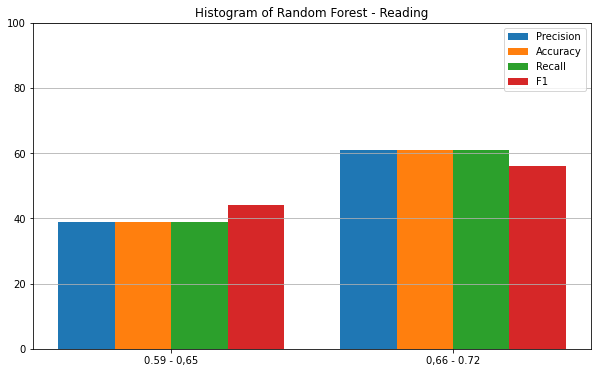

In [22]:
# Visualization

print("Random Forest - Reading")
print ("Precision Average : ", np.mean(RRprecisionArr))
print ("Precision Range   : ", np.min(RRprecisionArr), '-', np.max(RRprecisionArr))
print ("Accuracy Average  : ", np.mean(RRaccuracyArr))
print ("Accuracy Range    : ", np.min(RRaccuracyArr), '-', np.max(RRaccuracyArr))
print ("Recall Average    : ", np.mean(RRrecallArr))
print ("Recall Range      : ", np.min(RRrecallArr), '-', np.max(RRrecallArr))
print ("F1 Average        : ", np.mean(RRf1Arr))
print ("F1 Range          : ", np.min(RRf1Arr), '-', np.max(RRf1Arr))
print ()

VizArr = [RRprecisionArr,RRaccuracyArr,RRrecallArr,RRf1Arr]
labelXtick_1 = str(np.min(VizArr))[:4] + ' - 0,65'
labelXtick_2 = '0,66 - ' + str(np.max(VizArr)+0.01)[:4]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Random Forest - Reading")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Precision', 'Accuracy', 'Recall', 'F1'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

fig = plt.figure(figsize =(10, 6)) 
plt.hist(VizArr,bins = [0.50,0.65,0.80], label=['Precision', 'Accuracy', 'Recall', 'F1'])
plt.xticks([0.575,0.725],labels=[labelXtick_1,labelXtick_2])
plt.ylim(ymin=0, ymax = 100)
plt.legend()
plt.grid(axis = 'y')
plt.plot()
plt.title(label="Histogram of Random Forest - Reading")
plt.show()

In [23]:
# Random Forest - Average Extra Predictors

Predictor = availablePredictors.drop(['parental level of education_cat'],axis = 1)
Predictor['math score_cat'] = availableLabel['math score_cat']
Label = availableLabel["reading score_cat"]

RAXprecisionArr = []
RAXrecallArr = []
RAXf1Arr = []
RAXaccuracyArr = []

for i in range (100):

  X_train, X_test, y_train, y_test = train_test_split(Predictor, Label, test_size = 0.3)

  randomForest = RandomForestClassifier(max_depth=3)
  randomForest.fit(X_train, y_train)

  y_pred = randomForest.predict(X_test)

  precision = precision_score(y_test,y_pred, average = 'weighted')
  RAXprecisionArr.append(precision)

  accuracy = accuracy_score(y_test,y_pred)
  RAXaccuracyArr.append(accuracy)

  recall = recall_score(y_test,y_pred, average = 'weighted')
  RAXrecallArr.append(recall)

  f1 = f1_score(y_test,y_pred, average='weighted')
  RAXf1Arr.append(f1)
  
print("Random Forest - Average Extra")
print ("Precision Average : ", np.mean(RAXprecisionArr))
print ("Accuracy Average : ", np.mean(RAXaccuracyArr))
print ("Recall Average : ", np.mean(RAXrecallArr))
print ("F1 Average : ", np.mean(RAXf1Arr))
print ()

Random Forest - Average Extra
Precision Average :  0.7982737214982916
Accuracy Average :  0.7949666666666666
Recall Average :  0.7949666666666666
F1 Average :  0.794750533157509



Random Forest - Average Extra
Precision Average :  0.7982737214982916
Precision Range   :  0.7301657804191429 - 0.8552009246088192
Accuracy Average  :  0.7949666666666666
Accuracy Range    :  0.73 - 0.85
Recall Average    :  0.7949666666666666
Recall Range      :  0.73 - 0.85
F1 Average        :  0.794750533157509
F1 Range          :  0.7296842105263158 - 0.850476912950836



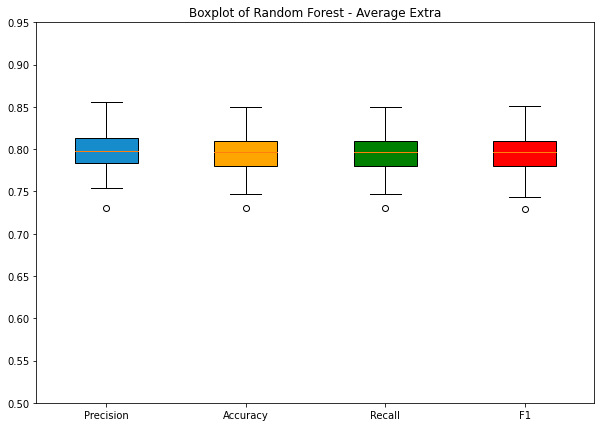

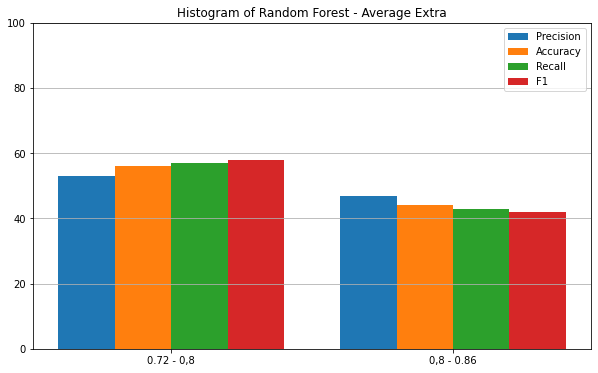

In [24]:
# Visualization

print("Random Forest - Average Extra")
print ("Precision Average : ", np.mean(RAXprecisionArr))
print ("Precision Range   : ", np.min(RAXprecisionArr), '-', np.max(RAXprecisionArr))
print ("Accuracy Average  : ", np.mean(RAXaccuracyArr))
print ("Accuracy Range    : ", np.min(RAXaccuracyArr), '-', np.max(RAXaccuracyArr))
print ("Recall Average    : ", np.mean(RAXrecallArr))
print ("Recall Range      : ", np.min(RAXrecallArr), '-', np.max(RAXrecallArr))
print ("F1 Average        : ", np.mean(RAXf1Arr))
print ("F1 Range          : ", np.min(RAXf1Arr), '-', np.max(RAXf1Arr))
print ()

VizArr = [RAXprecisionArr,RAXaccuracyArr,RAXrecallArr,RAXf1Arr]
labelXtick_1 = str(np.min(VizArr))[:4] + ' - 0,8'
labelXtick_2 = '0,8 - ' + str(np.max(VizArr)+0.01)[:4]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Random Forest - Average Extra")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Precision', 'Accuracy', 'Recall', 'F1'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

fig = plt.figure(figsize =(10, 6)) 
plt.hist(VizArr,bins = [0.70,0.80,0.90], label=['Precision', 'Accuracy', 'Recall', 'F1'])
plt.xticks([0.75,0.85],labels=[labelXtick_1,labelXtick_2])
plt.ylim(ymin=0, ymax = 100)
plt.legend()
plt.grid(axis = 'y')
plt.plot()
plt.title(label="Histogram of Random Forest - Average Extra")
plt.show()

In [74]:
# Gradient Boosting - Average

Predictor = availablePredictors.drop(['parental level of education_cat'],axis = 1)
Label = availableLabel["average score_cat"]

GAprecisionArr = []
GArecallArr = []
GAf1Arr = []
GAaccuracyArr = []

for i in range (100):

  X_train, X_test, y_train, y_test = train_test_split(Predictor, Label, test_size = 0.3)

  gradientBoosting = GradientBoostingClassifier()
  gradientBoosting.fit(X_train, y_train)

  y_pred = gradientBoosting.predict(X_test)

  precision = precision_score(y_test,y_pred, average = 'weighted', zero_division = 1)
  GAprecisionArr.append(precision)
  
  accuracy = accuracy_score(y_test,y_pred)
  GAaccuracyArr.append(accuracy)

  recall = recall_score(y_test,y_pred, average = 'weighted')
  GArecallArr.append(recall)

  f1 = f1_score(y_test,y_pred, average='weighted')
  GAf1Arr.append(f1)

print("Gradient Boosting - Average")
print ("Precision Average : ", np.mean(GAprecisionArr))
print ("Accuracy Average : ", np.mean(GAaccuracyArr))
print ("Recall Average : ", np.mean(GArecallArr))
print ("F1 Average : ", np.mean(GAf1Arr))
print ()


Gradient Boosting - Average
Precision Average :  0.6351692442679688
Accuracy Average :  0.6322333333333333
Recall Average :  0.6322333333333333
F1 Average :  0.6308003478316626



Gradient Boosting - Average
Precision Average :  0.6351692442679688
Precision Range   :  0.5851416122004357 - 0.6968244047619048
Accuracy Average  :  0.6322333333333333
Accuracy Range    :  0.58 - 0.6966666666666667
Recall Average    :  0.6322333333333333
Recall Range      :  0.58 - 0.6966666666666667
F1 Average        :  0.6308003478316626
F1 Range          :  0.5813125 - 0.6967377929632979



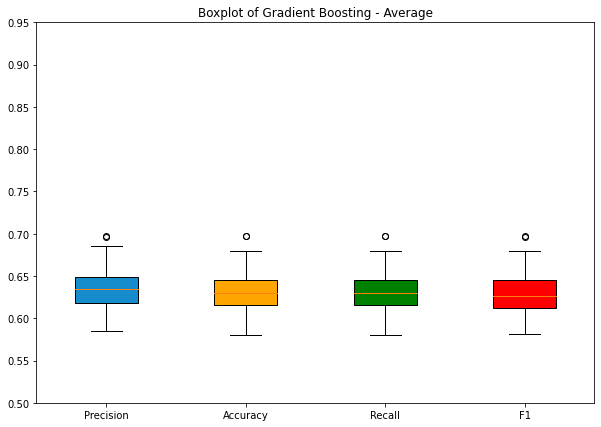

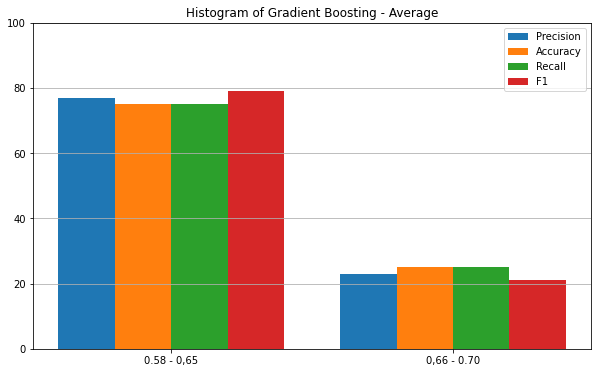

In [75]:
# Visualization

print("Gradient Boosting - Average")
print ("Precision Average : ", np.mean(GAprecisionArr))
print ("Precision Range   : ", np.min(GAprecisionArr), '-', np.max(GAprecisionArr))
print ("Accuracy Average  : ", np.mean(GAaccuracyArr))
print ("Accuracy Range    : ", np.min(GAaccuracyArr), '-', np.max(GAaccuracyArr))
print ("Recall Average    : ", np.mean(GArecallArr))
print ("Recall Range      : ", np.min(GArecallArr), '-', np.max(GArecallArr))
print ("F1 Average        : ", np.mean(GAf1Arr))
print ("F1 Range          : ", np.min(GAf1Arr), '-', np.max(GAf1Arr))
print ()

VizArr = [GAprecisionArr,GAaccuracyArr,GArecallArr,GAf1Arr]
labelXtick_1 = str(np.min(VizArr))[:4] + ' - 0,65'
labelXtick_2 = '0,66 - ' + str(np.max(VizArr)+0.01)[:4]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Gradient Boosting - Average")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Precision', 'Accuracy', 'Recall', 'F1'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

fig = plt.figure(figsize =(10, 6)) 
plt.hist(VizArr,bins = [0.50,0.65,0.80], label=['Precision', 'Accuracy', 'Recall', 'F1'])
plt.xticks([0.575,0.725],labels=[labelXtick_1,labelXtick_2])
plt.ylim(ymin=0, ymax = 100)
plt.legend()
plt.grid(axis = 'y')
plt.plot()
plt.title(label="Histogram of Gradient Boosting - Average")
plt.show()

In [78]:
# Gradient Boosting - Math

Predictor = availablePredictors.drop(['parental level of education_cat'],axis = 1)
Label = availableLabel["math score_cat"]

GMprecisionArr = []
GMrecallArr = []
GMf1Arr = []
GMaccuracyArr = []

for i in range (100):

  X_train, X_test, y_train, y_test = train_test_split(Predictor, Label, test_size = 0.3)

  gradientBoosting = GradientBoostingClassifier()
  gradientBoosting.fit(X_train, y_train)

  y_pred = gradientBoosting.predict(X_test)

  precision = precision_score(y_test,y_pred, average = 'weighted', zero_division = 1)
  GMprecisionArr.append(precision)
  
  accuracy = accuracy_score(y_test,y_pred)
  GMaccuracyArr.append(accuracy)

  recall = recall_score(y_test,y_pred, average = 'weighted')
  GMrecallArr.append(recall)

  f1 = f1_score(y_test,y_pred, average='weighted')
  GMf1Arr.append(f1)

print("Gradient Boosting - Math")
print ("Precision Average : ", np.mean(GMprecisionArr))
print ("Accuracy Average : ", np.mean(GMaccuracyArr))
print ("Recall Average : ", np.mean(GMrecallArr))
print ("F1 Average : ", np.mean(GMf1Arr))
print ()


Gradient Boosting - Math
Precision Average :  0.6464686863889814
Accuracy Average :  0.6497333333333333
Recall Average :  0.6497333333333333
F1 Average :  0.6426224181483401



Gradient Boosting - Math
Precision Average :  0.6464686863889814
Precision Range   :  0.6012934637820955 - 0.694535519125683
Accuracy Average  :  0.6497333333333333
Accuracy Range    :  0.5966666666666667 - 0.6966666666666667
Recall Average    :  0.6497333333333333
Recall Range      :  0.5966666666666667 - 0.6966666666666667
F1 Average        :  0.6426224181483401
F1 Range          :  0.5839434610646438 - 0.6942696685055415



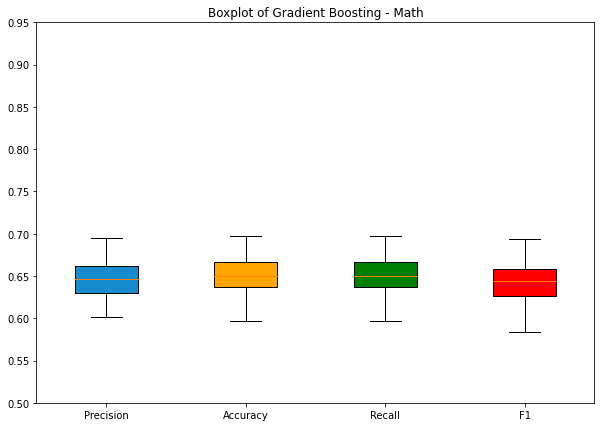

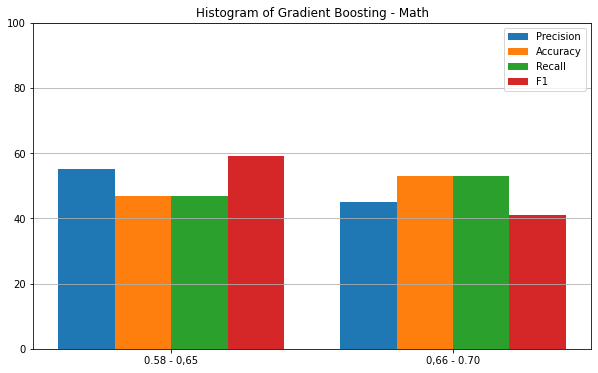

In [79]:
# Visualization

print("Gradient Boosting - Math")
print ("Precision Average : ", np.mean(GMprecisionArr))
print ("Precision Range   : ", np.min(GMprecisionArr), '-', np.max(GMprecisionArr))
print ("Accuracy Average  : ", np.mean(GMaccuracyArr))
print ("Accuracy Range    : ", np.min(GMaccuracyArr), '-', np.max(GMaccuracyArr))
print ("Recall Average    : ", np.mean(GMrecallArr))
print ("Recall Range      : ", np.min(GMrecallArr), '-', np.max(GMrecallArr))
print ("F1 Average        : ", np.mean(GMf1Arr))
print ("F1 Range          : ", np.min(GMf1Arr), '-', np.max(GMf1Arr))
print ()

VizArr = [GMprecisionArr,GMaccuracyArr,GMrecallArr,GMf1Arr]
labelXtick_1 = str(np.min(VizArr))[:4] + ' - 0,65'
labelXtick_2 = '0,66 - ' + str(np.max(VizArr)+0.01)[:4]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Gradient Boosting - Math")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Precision', 'Accuracy', 'Recall', 'F1'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

fig = plt.figure(figsize =(10, 6)) 
plt.hist(VizArr,bins = [0.50,0.65,0.80], label=['Precision', 'Accuracy', 'Recall', 'F1'])
plt.xticks([0.575,0.725],labels=[labelXtick_1,labelXtick_2])
plt.ylim(ymin=0, ymax = 100)
plt.legend()
plt.grid(axis = 'y')
plt.plot()
plt.title(label="Histogram of Gradient Boosting - Math")
plt.show()

In [80]:
# Gradient Boosting - Writing

Predictor = availablePredictors.drop([],axis = 1)
Label = availableLabel["writing score_cat"]

GWprecisionArr = []
GWrecallArr = []
GWf1Arr = []
GWaccuracyArr = []

for i in range (100):

  X_train, X_test, y_train, y_test = train_test_split(Predictor, Label, test_size = 0.3)

  gradientBoosting = GradientBoostingClassifier()
  gradientBoosting.fit(X_train, y_train)

  y_pred = gradientBoosting.predict(X_test)

  precision = precision_score(y_test,y_pred, average = 'weighted', zero_division = 1)
  GWprecisionArr.append(precision)
  
  accuracy = accuracy_score(y_test,y_pred)
  GWaccuracyArr.append(accuracy)

  recall = recall_score(y_test,y_pred, average = 'weighted')
  GWrecallArr.append(recall)

  f1 = f1_score(y_test,y_pred, average='weighted')
  GWf1Arr.append(f1)

print("Gradient Boosting - Writing")
print ("Precision Average : ", np.mean(GWprecisionArr))
print ("Accuracy Average : ", np.mean(GWaccuracyArr))
print ("Recall Average : ", np.mean(GWrecallArr))
print ("F1 Average : ", np.mean(GWf1Arr))
print ()

Gradient Boosting - Writing
Precision Average :  0.7016084832336505
Accuracy Average :  0.6994666666666667
Recall Average :  0.6994666666666667
F1 Average :  0.6992488199819068



Gradient Boosting - Writing
Precision Average :  0.7016084832336505
Precision Range   :  0.6372054696895462 - 0.7513227513227513
Accuracy Average  :  0.6994666666666667
Accuracy Range    :  0.6333333333333333 - 0.75
Recall Average    :  0.6994666666666667
Recall Range      :  0.6333333333333333 - 0.75
F1 Average        :  0.6992488199819068
F1 Range          :  0.6334637094981999 - 0.7502532533312554



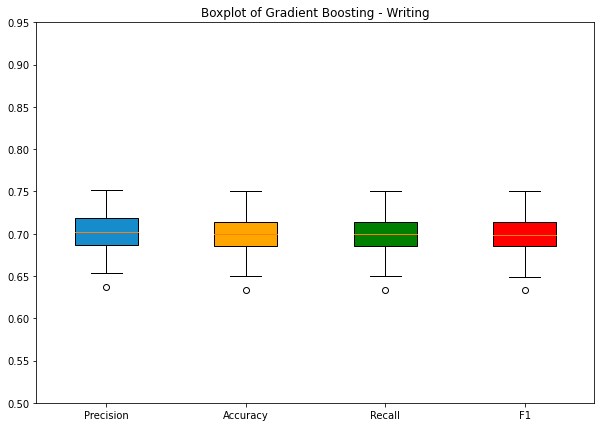

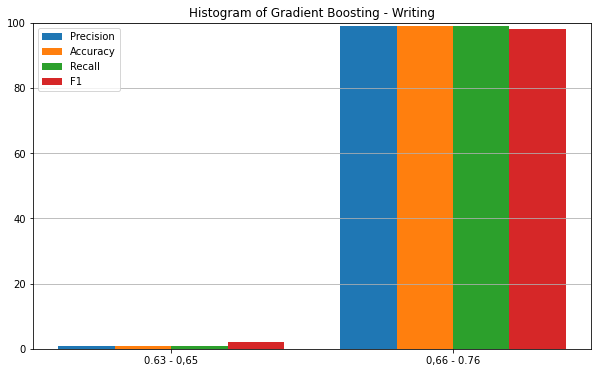

In [81]:
# Visualization

print("Gradient Boosting - Writing")
print ("Precision Average : ", np.mean(GWprecisionArr))
print ("Precision Range   : ", np.min(GWprecisionArr), '-', np.max(GWprecisionArr))
print ("Accuracy Average  : ", np.mean(GWaccuracyArr))
print ("Accuracy Range    : ", np.min(GWaccuracyArr), '-', np.max(GWaccuracyArr))
print ("Recall Average    : ", np.mean(GWrecallArr))
print ("Recall Range      : ", np.min(GWrecallArr), '-', np.max(GWrecallArr))
print ("F1 Average        : ", np.mean(GWf1Arr))
print ("F1 Range          : ", np.min(GWf1Arr), '-', np.max(GWf1Arr))
print ()

VizArr = [GWprecisionArr,GWaccuracyArr,GWrecallArr,GWf1Arr]
labelXtick_1 = str(np.min(VizArr))[:4] + ' - 0,65'
labelXtick_2 = '0,66 - ' + str(np.max(VizArr)+0.01)[:4]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Gradient Boosting - Writing")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Precision', 'Accuracy', 'Recall', 'F1'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

fig = plt.figure(figsize =(10, 6)) 
plt.hist(VizArr,bins = [0.50,0.65,0.80], label=['Precision', 'Accuracy', 'Recall', 'F1'])
plt.xticks([0.575,0.725],labels=[labelXtick_1,labelXtick_2])
plt.ylim(ymin=0, ymax = 100)
plt.legend()
plt.grid(axis = 'y')
plt.plot()
plt.title(label="Histogram of Gradient Boosting - Writing")
plt.show()

In [86]:
# Gradient Boosting - Reading

Predictor = availablePredictors.drop([],axis = 1)
Label = availableLabel["reading score_cat"]

GRprecisionArr = []
GRrecallArr = []
GRf1Arr = []
GRaccuracyArr = []

for i in range (100):

  X_train, X_test, y_train, y_test = train_test_split(Predictor, Label, test_size = 0.3)

  gradientBoosting = GradientBoostingClassifier()
  gradientBoosting.fit(X_train, y_train)

  y_pred = gradientBoosting.predict(X_test)

  precision = precision_score(y_test,y_pred, average = 'weighted', zero_division = 1)
  GRprecisionArr.append(precision)
  
  accuracy = accuracy_score(y_test,y_pred)
  GRaccuracyArr.append(accuracy)

  recall = recall_score(y_test,y_pred, average = 'weighted')
  GRrecallArr.append(recall)

  f1 = f1_score(y_test,y_pred, average='weighted')
  GRf1Arr.append(f1)

print("Gradient Boosting - Reading")
print ("Precision Average : ", np.mean(GRprecisionArr))
print ("Accuracy Average : ", np.mean(GRaccuracyArr))
print ("Recall Average : ", np.mean(GRrecallArr))
print ("F1 Average : ", np.mean(GRf1Arr))
print ()

Gradient Boosting - Reading
Precision Average :  0.6438902861432173
Accuracy Average :  0.6414666666666667
Recall Average :  0.6414666666666667
F1 Average :  0.6412673679993016



Gradient Boosting - Reading
Precision Average :  0.6438902861432173
Precision Range   :  0.5914675459596187 - 0.6984741952886172
Accuracy Average  :  0.6414666666666667
Accuracy Range    :  0.59 - 0.69
Recall Average    :  0.6414666666666667
Recall Range      :  0.59 - 0.69
F1 Average        :  0.6412673679993016
F1 Range          :  0.5883488213835496 - 0.6898449844984498



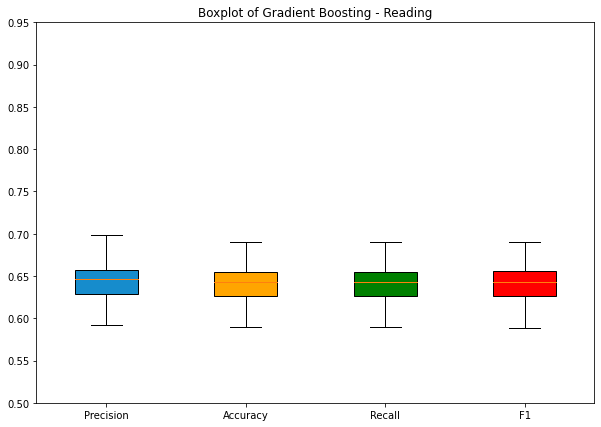

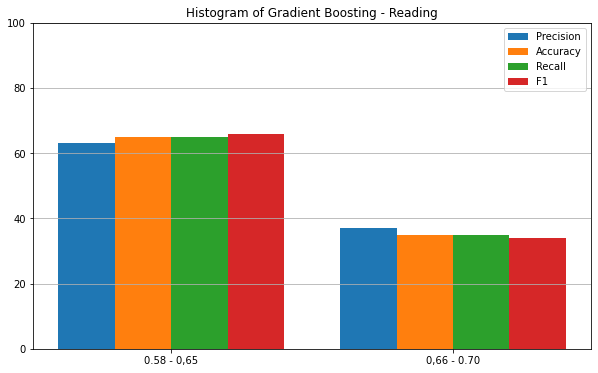

In [87]:
# Visualization

print("Gradient Boosting - Reading")
print ("Precision Average : ", np.mean(GRprecisionArr))
print ("Precision Range   : ", np.min(GRprecisionArr), '-', np.max(GRprecisionArr))
print ("Accuracy Average  : ", np.mean(GRaccuracyArr))
print ("Accuracy Range    : ", np.min(GRaccuracyArr), '-', np.max(GRaccuracyArr))
print ("Recall Average    : ", np.mean(GRrecallArr))
print ("Recall Range      : ", np.min(GRrecallArr), '-', np.max(GRrecallArr))
print ("F1 Average        : ", np.mean(GRf1Arr))
print ("F1 Range          : ", np.min(GRf1Arr), '-', np.max(GRf1Arr))
print ()

VizArr = [GRprecisionArr,GRaccuracyArr,GRrecallArr,GRf1Arr]
labelXtick_1 = str(np.min(VizArr))[:4] + ' - 0,65'
labelXtick_2 = '0,66 - ' + str(np.max(VizArr)+0.01)[:4]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Gradient Boosting - Reading")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Precision', 'Accuracy', 'Recall', 'F1'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

fig = plt.figure(figsize =(10, 6)) 
plt.hist(VizArr,bins = [0.50,0.65,0.80], label=['Precision', 'Accuracy', 'Recall', 'F1'])
plt.xticks([0.575,0.725],labels=[labelXtick_1,labelXtick_2])
plt.ylim(ymin=0, ymax = 100)
plt.legend()
plt.grid(axis = 'y')
plt.plot()
plt.title(label="Histogram of Gradient Boosting - Reading")
plt.show()

In [90]:
# Gradient Boosting - Math Extra

Predictor = availablePredictors.drop(['parental level of education_cat'],axis = 1)
Predictor['writing score_cat'] = availableLabel['writing score_cat']
Label = availableLabel["math score_cat"]

GMXprecisionArr = []
GMXrecallArr = []
GMXf1Arr = []
GMXaccuracyArr = []

for i in range (100):

  X_train, X_test, y_train, y_test = train_test_split(Predictor, Label, test_size = 0.3)

  gradientBoosting = GradientBoostingClassifier()
  gradientBoosting.fit(X_train, y_train)

  y_pred = gradientBoosting.predict(X_test)

  precision = precision_score(y_test,y_pred, average = 'weighted', zero_division = 1)
  GMXprecisionArr.append(precision)
  
  accuracy = accuracy_score(y_test,y_pred)
  GMXaccuracyArr.append(accuracy)

  recall = recall_score(y_test,y_pred, average = 'weighted')
  GMXrecallArr.append(recall)

  f1 = f1_score(y_test,y_pred, average='weighted')
  GMXf1Arr.append(f1)

print("Gradient Boosting - Math Extra")
print ("Precision Average : ", np.mean(GMXprecisionArr))
print ("Accuracy Average : ", np.mean(GMXaccuracyArr))
print ("Recall Average : ", np.mean(GMXrecallArr))
print ("F1 Average : ", np.mean(GMXf1Arr))
print ()

Gradient Boosting - Math Extra
Precision Average :  0.7755067121657332
Accuracy Average :  0.7730666666666667
Recall Average :  0.7730666666666667
F1 Average :  0.7720100202237076



Gradient Boosting - Math Extra
Precision Average :  0.7755067121657332
Precision Range   :  0.7358936199531486 - 0.8397179788484137
Accuracy Average  :  0.7730666666666667
Accuracy Range    :  0.7366666666666667 - 0.84
Recall Average    :  0.7730666666666667
Recall Range      :  0.7366666666666667 - 0.84
F1 Average        :  0.7720100202237076
F1 Range          :  0.7362056774104968 - 0.8388888888888889



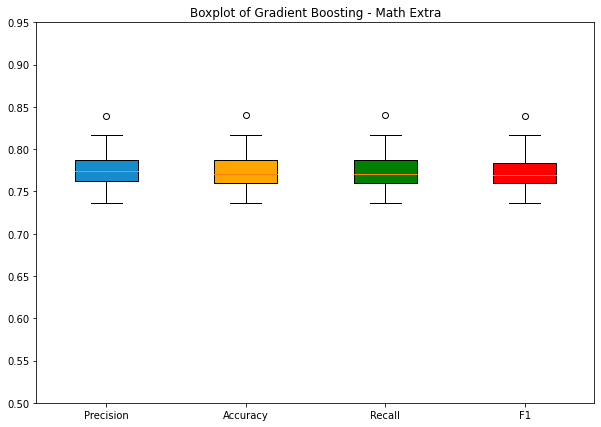

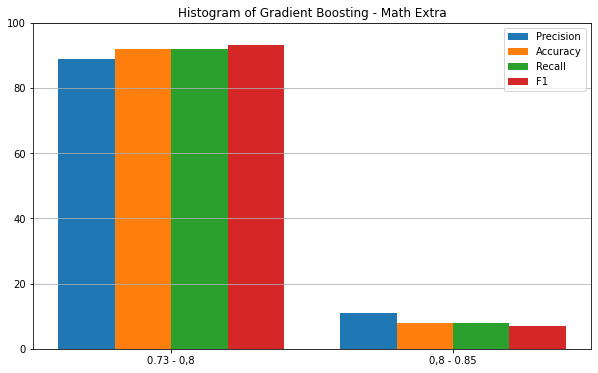

In [91]:
# Visualization

print("Gradient Boosting - Math Extra")
print ("Precision Average : ", np.mean(GMXprecisionArr))
print ("Precision Range   : ", np.min(GMXprecisionArr), '-', np.max(GMXprecisionArr))
print ("Accuracy Average  : ", np.mean(GMXaccuracyArr))
print ("Accuracy Range    : ", np.min(GMXaccuracyArr), '-', np.max(GMXaccuracyArr))
print ("Recall Average    : ", np.mean(GMXrecallArr))
print ("Recall Range      : ", np.min(GMXrecallArr), '-', np.max(GMXrecallArr))
print ("F1 Average        : ", np.mean(GMXf1Arr))
print ("F1 Range          : ", np.min(GMXf1Arr), '-', np.max(GMXf1Arr))
print ()

VizArr = [GMXprecisionArr,GMXaccuracyArr,GMXrecallArr,GMXf1Arr]
labelXtick_1 = str(np.min(VizArr))[:4] + ' - 0,8'
labelXtick_2 = '0,8 - ' + str(np.max(VizArr)+0.01)[:4]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Gradient Boosting - Math Extra")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Precision', 'Accuracy', 'Recall', 'F1'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

fig = plt.figure(figsize =(10, 6)) 
plt.hist(VizArr,bins = [0.70,0.80,0.90], label=['Precision', 'Accuracy', 'Recall', 'F1'])
plt.xticks([0.75,0.85],labels=[labelXtick_1,labelXtick_2])
plt.ylim(ymin=0, ymax = 100)
plt.legend()
plt.grid(axis = 'y')
plt.plot()
plt.title(label="Histogram of Gradient Boosting - Math Extra")
plt.show()

In [105]:
# Decision Tree - Average

Predictor = availablePredictors.drop(['parental level of education_cat'],axis = 1)
Label = availableLabel["average score_cat"]

DAprecisionArr = []
DArecallArr = []
DAf1Arr = []
DAaccuracyArr = []

for i in range (100):

  X_train, X_test, y_train, y_test = train_test_split(Predictor, Label, test_size = 0.3)

  decisionTree = DecisionTreeClassifier()
  decisionTree.fit(X_train, y_train)

  y_pred = decisionTree.predict(X_test)

  precision = precision_score(y_test,y_pred, average = 'weighted', zero_division = 1)
  DAprecisionArr.append(precision)
  
  accuracy = accuracy_score(y_test,y_pred)
  DAaccuracyArr.append(accuracy)

  recall = recall_score(y_test,y_pred, average = 'weighted')
  DArecallArr.append(recall)

  f1 = f1_score(y_test,y_pred, average='weighted')
  DAf1Arr.append(f1)

print("Decision Tree - Average")
print ("Precision Average : ", np.mean(DAprecisionArr))
print ("Accuracy Average : ", np.mean(DAaccuracyArr))
print ("Recall Average : ", np.mean(DArecallArr))
print ("F1 Average : ", np.mean(DAf1Arr))
print ()


Decision Tree - Average
Precision Average :  0.6197588476406343
Accuracy Average :  0.6182333333333334
Recall Average :  0.6182333333333334
F1 Average :  0.6160924202576442



Decision Tree - Average
Precision Average :  0.6197588476406343
Precision Range   :  0.5657387057387058 - 0.684954400916824
Accuracy Average  :  0.6182333333333334
Accuracy Range    :  0.5666666666666667 - 0.6866666666666666
Recall Average    :  0.6182333333333334
Recall Range      :  0.5666666666666667 - 0.6866666666666666
F1 Average        :  0.6160924202576442
F1 Range          :  0.5568578934506354 - 0.6812550876704273



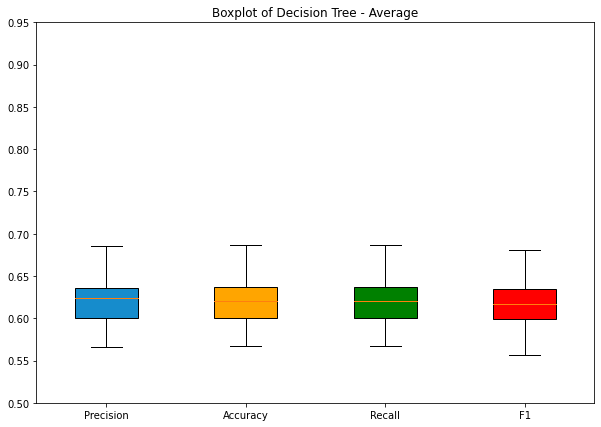

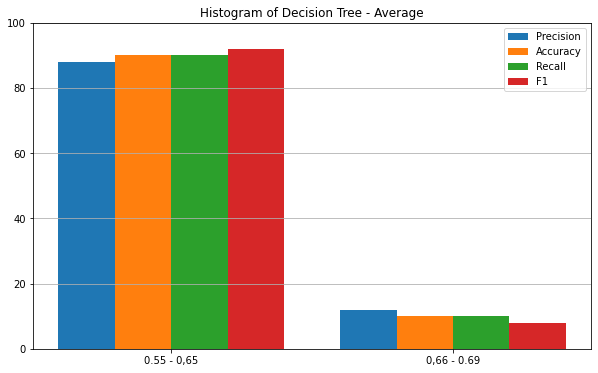

In [106]:
# Visualization

print("Decision Tree - Average")
print ("Precision Average : ", np.mean(DAprecisionArr))
print ("Precision Range   : ", np.min(DAprecisionArr), '-', np.max(DAprecisionArr))
print ("Accuracy Average  : ", np.mean(DAaccuracyArr))
print ("Accuracy Range    : ", np.min(DAaccuracyArr), '-', np.max(DAaccuracyArr))
print ("Recall Average    : ", np.mean(DArecallArr))
print ("Recall Range      : ", np.min(DArecallArr), '-', np.max(DArecallArr))
print ("F1 Average        : ", np.mean(DAf1Arr))
print ("F1 Range          : ", np.min(DAf1Arr), '-', np.max(DAf1Arr))
print ()

VizArr = [DAprecisionArr,DAaccuracyArr,DArecallArr,DAf1Arr]
labelXtick_1 = str(np.min(VizArr))[:4] + ' - 0,65'
labelXtick_2 = '0,66 - ' + str(np.max(VizArr)+0.01)[:4]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Decision Tree - Average")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Precision', 'Accuracy', 'Recall', 'F1'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

fig = plt.figure(figsize =(10, 6)) 
plt.hist(VizArr,bins = [0.50,0.65,0.80], label=['Precision', 'Accuracy', 'Recall', 'F1'], range=[0.55, 0.9])
plt.xticks([0.575,0.725],labels=[labelXtick_1,labelXtick_2])
plt.ylim(ymin=0, ymax = 100)
plt.legend()
plt.grid(axis = 'y')
plt.plot()
plt.title(label="Histogram of Decision Tree - Average")
plt.show()

In [97]:
# Decision Tree - Math

Predictor = availablePredictors.drop(['parental level of education_cat'],axis = 1)
Label = availableLabel["math score_cat"]

DMprecisionArr = []
DMrecallArr = []
DMf1Arr = []
DMaccuracyArr = []

for i in range (100):

  X_train, X_test, y_train, y_test = train_test_split(Predictor, Label, test_size = 0.3)

  decisionTree = DecisionTreeClassifier()
  decisionTree.fit(X_train, y_train)

  y_pred = decisionTree.predict(X_test)

  precision = precision_score(y_test,y_pred, average = 'weighted', zero_division = 1)
  DMprecisionArr.append(precision)
  
  accuracy = accuracy_score(y_test,y_pred)
  DMaccuracyArr.append(accuracy)

  recall = recall_score(y_test,y_pred, average = 'weighted')
  DMrecallArr.append(recall)

  f1 = f1_score(y_test,y_pred, average='weighted')
  DMf1Arr.append(f1)

print("Decision Tree - Math")
print ("Precision Average : ", np.mean(DMprecisionArr))
print ("Accuracy Average : ", np.mean(DMaccuracyArr))
print ("Recall Average : ", np.mean(DMrecallArr))
print ("F1 Average : ", np.mean(DMf1Arr))
print ()


Decision Tree - Math
Precision Average :  0.6436484376682404
Accuracy Average :  0.6459333333333332
Recall Average :  0.6459333333333332
F1 Average :  0.6364388676334706



Decision Tree - Math
Precision Average :  0.6431846698856277
Precision Range   :  0.5729166666666666 - 0.6897431049637627
Accuracy Average :  0.6471333333333333
Accuracy Range   :  0.5833333333333334 - 0.6933333333333334
Recall Average :  0.6471333333333333
Recall Range   :  0.5833333333333334 - 0.6933333333333334
F1 Average :  0.637697693378202
F1 Range   :  0.5604472733252317 - 0.6912571951857664



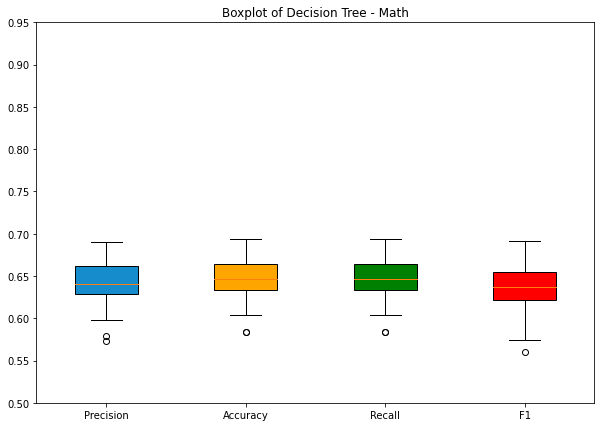

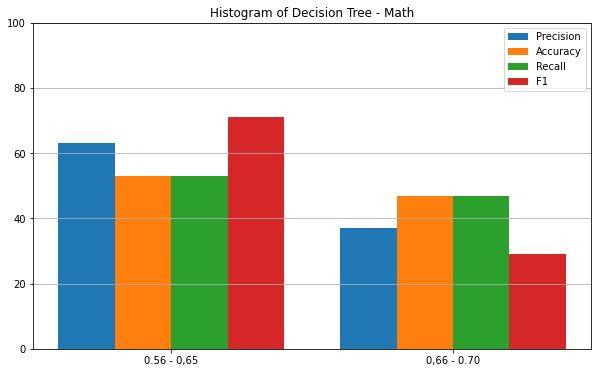

In [38]:
# Visualization

print("Decision Tree - Math")
print ("Precision Average : ", np.mean(DMprecisionArr))
print ("Precision Range   : ", np.min(DMprecisionArr), '-', np.max(DMprecisionArr))
print ("Accuracy Average : ", np.mean(DMaccuracyArr))
print ("Accuracy Range   : ", np.min(DMaccuracyArr), '-', np.max(DMaccuracyArr))
print ("Recall Average : ", np.mean(DMrecallArr))
print ("Recall Range   : ", np.min(DMrecallArr), '-', np.max(DMrecallArr))
print ("F1 Average : ", np.mean(DMf1Arr))
print ("F1 Range   : ", np.min(DMf1Arr), '-', np.max(DMf1Arr))
print ()

VizArr = [DMprecisionArr,DMaccuracyArr,DMrecallArr,DMf1Arr]
labelXtick_1 = str(np.min(VizArr))[:4] + ' - 0,65'
labelXtick_2 = '0,66 - ' + str(np.max(VizArr)+0.01)[:4]
fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Decision Tree - Math")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Precision', 'Accuracy', 'Recall', 'F1'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

fig = plt.figure(figsize =(10, 6)) 
plt.hist(VizArr,bins = [0.50,0.65,0.80], label=['Precision', 'Accuracy', 'Recall', 'F1'])
plt.xticks([0.575,0.725],labels=[labelXtick_1,labelXtick_2])
plt.ylim(ymin=0, ymax = 100)
plt.legend()
plt.grid(axis = 'y')
plt.plot()
plt.title(label="Histogram of Decision Tree - Math")
plt.show()

In [118]:
# Decision Tree - Writing

Predictor = availablePredictors.drop([],axis = 1)
Label = availableLabel["writing score_cat"]

DWprecisionArr = []
DWrecallArr = []
DWf1Arr = []
DWaccuracyArr = []

for i in range (100):

  X_train, X_test, y_train, y_test = train_test_split(Predictor, Label, test_size = 0.3)

  decisionTree = DecisionTreeClassifier()
  decisionTree.fit(X_train, y_train)

  y_pred = decisionTree.predict(X_test)

  precision = precision_score(y_test,y_pred, average = 'weighted', zero_division = 1)
  DWprecisionArr.append(precision)
  
  accuracy = accuracy_score(y_test,y_pred)
  DWaccuracyArr.append(accuracy)

  recall = recall_score(y_test,y_pred, average = 'weighted')
  DWrecallArr.append(recall)

  f1 = f1_score(y_test,y_pred, average='weighted')
  DWf1Arr.append(f1)

print("Decision Tree - Writing")
print ("Precision Average : ", np.mean(DWprecisionArr))
print ("Accuracy Average : ", np.mean(DWaccuracyArr))
print ("Recall Average : ", np.mean(DWrecallArr))
print ("F1 Average : ", np.mean(DWf1Arr))
print ()

Decision Tree - Writing
Precision Average :  0.6564310688726447
Accuracy Average :  0.6511333333333333
Recall Average :  0.6511333333333333
F1 Average :  0.6488768401351142



Decision Tree - Writing
Precision Average :  0.6564310688726447
Precision Range   :  0.5964146482893974 - 0.7033333333333334
Accuracy Average  :  0.6511333333333333
Accuracy Range    :  0.5966666666666667 - 0.7
Recall Average    :  0.6511333333333333
Recall Range      :  0.5966666666666667 - 0.7
F1 Average        :  0.6488768401351142
F1 Range          :  0.596374822351601 - 0.697077922077922



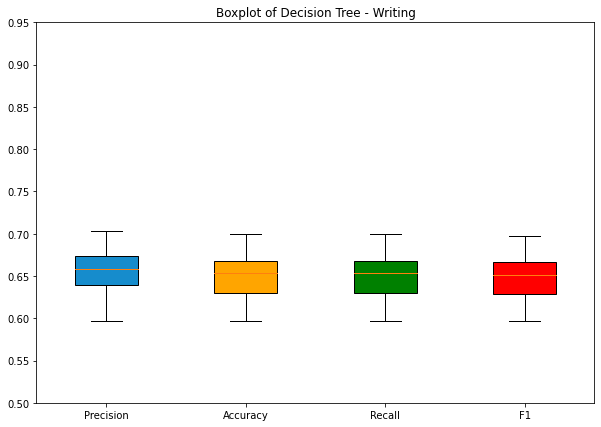

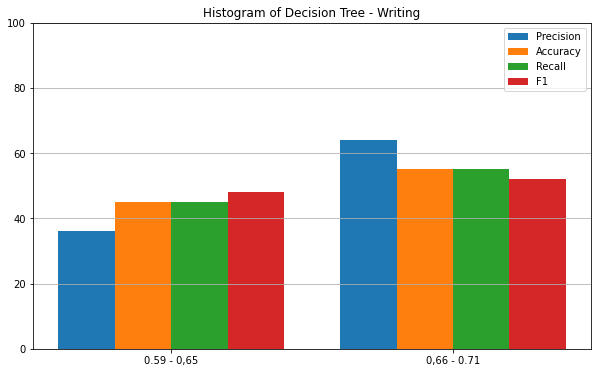

In [119]:
# Visualization

print("Decision Tree - Writing")
print ("Precision Average : ", np.mean(DWprecisionArr))
print ("Precision Range   : ", np.min(DWprecisionArr), '-', np.max(DWprecisionArr))
print ("Accuracy Average  : ", np.mean(DWaccuracyArr))
print ("Accuracy Range    : ", np.min(DWaccuracyArr), '-', np.max(DWaccuracyArr))
print ("Recall Average    : ", np.mean(DWrecallArr))
print ("Recall Range      : ", np.min(DWrecallArr), '-', np.max(DWrecallArr))
print ("F1 Average        : ", np.mean(DWf1Arr))
print ("F1 Range          : ", np.min(DWf1Arr), '-', np.max(DWf1Arr))
print ()

VizArr = [DWprecisionArr,DWaccuracyArr,DWrecallArr,DWf1Arr]
labelXtick_1 = str(np.min(VizArr))[:4] + ' - 0,65'
labelXtick_2 = '0,66 - ' + str(np.max(VizArr)+0.01)[:4]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Decision Tree - Writing")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Precision', 'Accuracy', 'Recall', 'F1'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

fig = plt.figure(figsize =(10, 6)) 
plt.hist(VizArr,bins = [0.50,0.65,0.80], label=['Precision', 'Accuracy', 'Recall', 'F1'])
plt.xticks([0.575,0.725],labels=[labelXtick_1,labelXtick_2])
plt.ylim(ymin=0, ymax = 100)
plt.legend()
plt.grid(axis = 'y')
plt.plot()
plt.title(label="Histogram of Decision Tree - Writing")
plt.show()

In [41]:
# Decision Tree - Reading

Predictor = availablePredictors.drop([],axis = 1)
Label = availableLabel["reading score_cat"]

DRprecisionArr = []
DRrecallArr = []
DRf1Arr = []
DRaccuracyArr = []

for i in range (100):

  X_train, X_test, y_train, y_test = train_test_split(Predictor, Label, test_size = 0.3)

  decisionTree = DecisionTreeClassifier()
  decisionTree.fit(X_train, y_train)

  y_pred = decisionTree.predict(X_test)

  precision = precision_score(y_test,y_pred, average = 'weighted', zero_division = 1)
  DRprecisionArr.append(precision)
  
  accuracy = accuracy_score(y_test,y_pred)
  DRaccuracyArr.append(accuracy)

  recall = recall_score(y_test,y_pred, average = 'weighted')
  DRrecallArr.append(recall)

  f1 = f1_score(y_test,y_pred, average='weighted')
  DRf1Arr.append(f1)

print("Decision Tree - Reading")
print ("Precision Average : ", np.mean(DRprecisionArr))
print ("Accuracy Average : ", np.mean(DRaccuracyArr))
print ("Recall Average : ", np.mean(DRrecallArr))
print ("F1 Average : ", np.mean(DRf1Arr))
print ()

Decision Tree - Reading
Precision Average :  0.6060351332706331
Accuracy Average :  0.5997333333333333
Recall Average :  0.5997333333333333
F1 Average :  0.5979278307563504



Decision Tree - Reading
Precision Average :  0.6060351332706331
Precision Range   :  0.5478628571428572 - 0.6615243568691844
Accuracy Average  :  0.5997333333333333
Accuracy Range    :  0.54 - 0.6566666666666666
Recall Average    :  0.5997333333333333
Recall Range      :  0.54 - 0.6566666666666666
F1 Average        :  0.5979278307563504
F1 Range          :  0.5313229757834919 - 0.6544601789034064



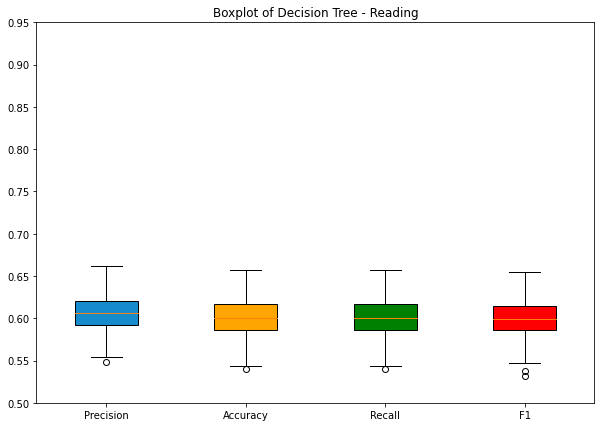

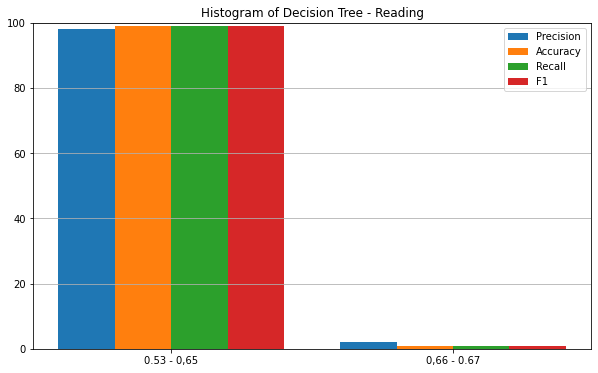

In [42]:
# Visualization

print("Decision Tree - Reading")
print ("Precision Average : ", np.mean(DRprecisionArr))
print ("Precision Range   : ", np.min(DRprecisionArr), '-', np.max(DRprecisionArr))
print ("Accuracy Average  : ", np.mean(DRaccuracyArr))
print ("Accuracy Range    : ", np.min(DRaccuracyArr), '-', np.max(DRaccuracyArr))
print ("Recall Average    : ", np.mean(DRrecallArr))
print ("Recall Range      : ", np.min(DRrecallArr), '-', np.max(DRrecallArr))
print ("F1 Average        : ", np.mean(DRf1Arr))
print ("F1 Range          : ", np.min(DRf1Arr), '-', np.max(DRf1Arr))
print ()

VizArr = [DRprecisionArr,DRaccuracyArr,DRrecallArr,DRf1Arr]
labelXtick_1 = str(np.min(VizArr))[:4] + ' - 0,65'
labelXtick_2 = '0,66 - ' + str(np.max(VizArr)+0.01)[:4]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Decision Tree - Reading")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Precision', 'Accuracy', 'Recall', 'F1'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

fig = plt.figure(figsize =(10, 6)) 
plt.hist(VizArr,bins = [0.50,0.65,0.80], label=['Precision', 'Accuracy', 'Recall', 'F1'])
plt.xticks([0.575,0.725],labels=[labelXtick_1,labelXtick_2])
plt.ylim(ymin=0, ymax = 100)
plt.legend()
plt.grid(axis = 'y')
plt.plot()
plt.title(label="Histogram of Decision Tree - Reading")
plt.show()

In [138]:
# Decision Tree - Writing Extra

Predictor = availablePredictors.drop([],axis = 1)
Predictor['reading score_cat'] = availableLabel['reading score_cat']
Label = availableLabel["writing score_cat"]

DWXprecisionArr = []
DWXrecallArr = []
DWXf1Arr = []
DWXaccuracyArr = []

for i in range (100):

  X_train, X_test, y_train, y_test = train_test_split(Predictor, Label, test_size = 0.3)

  decisionTree = DecisionTreeClassifier()
  decisionTree.fit(X_train, y_train)

  y_pred = decisionTree.predict(X_test)

  precision = precision_score(y_test,y_pred, average = 'weighted', zero_division = 1)
  DWXprecisionArr.append(precision)
  
  accuracy = accuracy_score(y_test,y_pred)
  DWXaccuracyArr.append(accuracy)

  recall = recall_score(y_test,y_pred, average = 'weighted')
  DWXrecallArr.append(recall)

  f1 = f1_score(y_test,y_pred, average='weighted')
  DWXf1Arr.append(f1)

print("Decision Tree - Writing Extra")
print ("Precision Average : ", np.mean(DWXprecisionArr))
print ("Accuracy Average : ", np.mean(DWXaccuracyArr))
print ("Recall Average : ", np.mean(DWXrecallArr))
print ("F1 Average : ", np.mean(DWXf1Arr))
print ()

Decision Tree - Writing Extra
Precision Average :  0.8595920596281492
Accuracy Average :  0.8585333333333334
Recall Average :  0.8585333333333334
F1 Average :  0.8584124937724107



In [139]:
Predictor = availablePredictors.drop([],axis = 1)
Predictor['reading score_cat'] = availableLabel['reading score_cat']
Predictor

,gender_cat,race/ethnicity_cat,parental level of education_cat,lunch_cat,test preparation course_cat,reading score_cat
0,0,1,1,1,1,1
1,0,2,2,1,0,1
2,0,1,4,1,1,1
3,1,0,0,0,1,0
4,1,2,2,1,1,1
...,...,...,...,...,...,...
995,0,4,4,1,0,1
996,1,2,3,0,1,0
997,0,2,3,0,0,1
998,0,3,2,1,0,1


Decision Tree - Writing Extra
Precision Average :  0.8595920596281492
Precision Range   :  0.8137886265617359 - 0.9033168294749989
Accuracy Average  :  0.8585333333333334
Accuracy Range    :  0.8133333333333334 - 0.9033333333333333
Recall Average    :  0.8585333333333334
Recall Range      :  0.8133333333333334 - 0.9033333333333333
F1 Average        :  0.8584124937724107
F1 Range          :  0.8134163885799036 - 0.9033150152526818



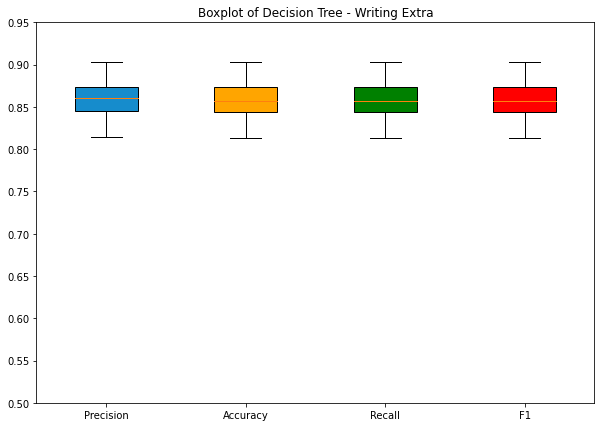

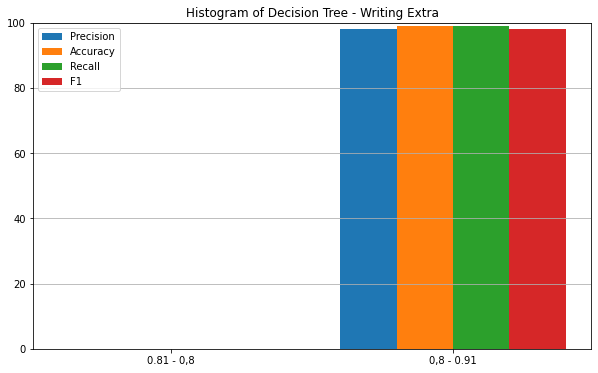

In [140]:
# Visualization

print("Decision Tree - Writing Extra")
print ("Precision Average : ", np.mean(DWXprecisionArr))
print ("Precision Range   : ", np.min(DWXprecisionArr), '-', np.max(DWXprecisionArr))
print ("Accuracy Average  : ", np.mean(DWXaccuracyArr))
print ("Accuracy Range    : ", np.min(DWXaccuracyArr), '-', np.max(DWXaccuracyArr))
print ("Recall Average    : ", np.mean(DWXrecallArr))
print ("Recall Range      : ", np.min(DWXrecallArr), '-', np.max(DWXrecallArr))
print ("F1 Average        : ", np.mean(DWXf1Arr))
print ("F1 Range          : ", np.min(DWXf1Arr), '-', np.max(DWXf1Arr))
print ()

VizArr = [DWXprecisionArr,DWXaccuracyArr,DWXrecallArr,DWXf1Arr]
labelXtick_1 = str(np.min(VizArr))[:4] + ' - 0,8'
labelXtick_2 = '0,8 - ' + str(np.max(VizArr)+0.01)[:4]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Decision Tree - Writing Extra")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Precision', 'Accuracy', 'Recall', 'F1'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

fig = plt.figure(figsize =(10, 6)) 
plt.hist(VizArr,bins = [0.70,0.80,0.90], label=['Precision', 'Accuracy', 'Recall', 'F1'])
plt.xticks([0.75,0.85],labels=[labelXtick_1,labelXtick_2])
plt.ylim(ymin=0, ymax = 100)
plt.legend()
plt.grid(axis = 'y')
plt.plot()
plt.title(label="Histogram of Decision Tree - Writing Extra")
plt.show()

In [147]:
# Naive Bayes - Average

Predictor = availablePredictors.drop(['parental level of education_cat'],axis = 1)
Label = availableLabel["average score_cat"]

NAprecisionArr = []
NArecallArr = []
NAf1Arr = []
NAaccuracyArr = []

for i in range (100):

  X_train, X_test, y_train, y_test = train_test_split(Predictor, Label, test_size = 0.3)

  GNaiveBayes = GaussianNB()
  GNaiveBayes.fit(X_train, y_train)

  y_pred = GNaiveBayes.predict(X_test)

  precision = precision_score(y_test,y_pred, average = 'weighted', zero_division = 1)
  NAprecisionArr.append(precision)
  
  accuracy = accuracy_score(y_test,y_pred)
  NAaccuracyArr.append(accuracy)

  recall = recall_score(y_test,y_pred, average = 'weighted')
  NArecallArr.append(recall)

  f1 = f1_score(y_test,y_pred, average='weighted')
  NAf1Arr.append(f1)

print("Gradient Boosting - Average")
print ("Precision Average : ", np.mean(NAprecisionArr))
print ("Accuracy Average : ", np.mean(NAaccuracyArr))
print ("Recall Average : ", np.mean(NArecallArr))
print ("F1 Average : ", np.mean(NAf1Arr))
print ()

Gradient Boosting - Average
Precision Average :  0.6534604818022361
Accuracy Average :  0.652
Recall Average :  0.652
F1 Average :  0.6494587543392782



Naive Bayes - Average
Precision Average :  0.6534604818022361
Precision Range   :  0.586251574044574 - 0.7168521031207598
Accuracy Average  :  0.652
Accuracy Range    :  0.5866666666666667 - 0.6933333333333334
Recall Average    :  0.652
Recall Range      :  0.5866666666666667 - 0.6933333333333334
F1 Average        :  0.6494587543392782
F1 Range          :  0.5843316594930655 - 0.690388238878045



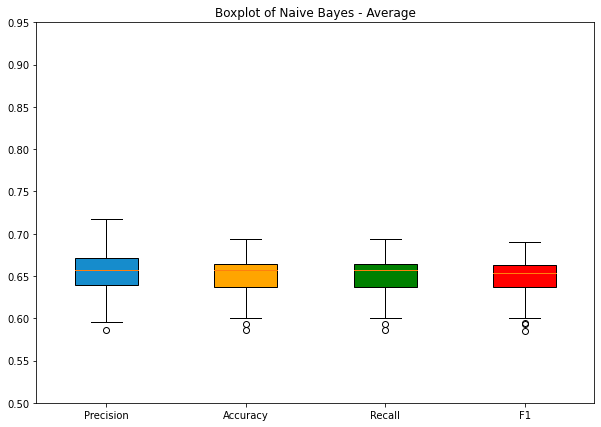

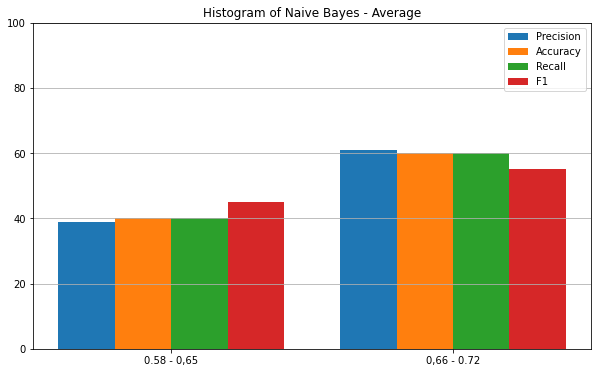

In [148]:
# Visualization

print("Naive Bayes - Average")
print ("Precision Average : ", np.mean(NAprecisionArr))
print ("Precision Range   : ", np.min(NAprecisionArr), '-', np.max(NAprecisionArr))
print ("Accuracy Average  : ", np.mean(NAaccuracyArr))
print ("Accuracy Range    : ", np.min(NAaccuracyArr), '-', np.max(NAaccuracyArr))
print ("Recall Average    : ", np.mean(NArecallArr))
print ("Recall Range      : ", np.min(NArecallArr), '-', np.max(NArecallArr))
print ("F1 Average        : ", np.mean(NAf1Arr))
print ("F1 Range          : ", np.min(NAf1Arr), '-', np.max(NAf1Arr))
print ()

VizArr = [NAprecisionArr,NAaccuracyArr,NArecallArr,NAf1Arr]
labelXtick_1 = str(np.min(VizArr))[:4] + ' - 0,65'
labelXtick_2 = '0,66 - ' + str(np.max(VizArr)+0.01)[:4]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Naive Bayes - Average")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Precision', 'Accuracy', 'Recall', 'F1'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

fig = plt.figure(figsize =(10, 6)) 
plt.hist(VizArr,bins = [0.50,0.65,0.80], label=['Precision', 'Accuracy', 'Recall', 'F1'])
plt.xticks([0.575,0.725],labels=[labelXtick_1,labelXtick_2])
plt.ylim(ymin=0, ymax = 100)
plt.legend()
plt.grid(axis = 'y')
plt.plot()
plt.title(label="Histogram of Naive Bayes - Average")
plt.show()

In [149]:
# Naive Bayes - Math

Predictor = availablePredictors.drop(['parental level of education_cat'],axis = 1)
Label = availableLabel["math score_cat"]

NMprecisionArr = []
NMrecallArr= []
NMf1Arr = []
NMaccuracyArr = []

for i in range (100):

  X_train, X_test, y_train, y_test = train_test_split(Predictor, Label, test_size = 0.3)

  GNaiveBayes = GaussianNB()
  GNaiveBayes.fit(X_train, y_train)

  y_pred = GNaiveBayes.predict(X_test)

  precision = precision_score(y_test,y_pred, average = 'weighted', zero_division = 1)
  NMprecisionArr.append(precision)
  
  accuracy = accuracy_score(y_test,y_pred)
  NMaccuracyArr.append(accuracy)

  recall = recall_score(y_test,y_pred, average = 'weighted')
  NMrecallArr.append(recall)

  f1 = f1_score(y_test,y_pred, average='weighted')
  NMf1Arr.append(f1)

print("Naive Bayes - Math")
print ("Precision Average : ", np.mean(NMprecisionArr))
print ("Accuracy Average : ", np.mean(NMaccuracyArr))
print ("Recall Average : ", np.mean(NMrecallArr))
print ("F1 Average : ", np.mean(NMf1Arr))
print ()

Naive Bayes - Math
Precision Average :  0.6614302037254428
Accuracy Average :  0.6631999999999999
Recall Average :  0.6631999999999999
F1 Average :  0.6588229498157067



Naive Bayes - Math
Precision Average :  0.6614302037254428
Precision Range   :  0.5909237536656892 - 0.711262026032824
Accuracy Average :  0.6631999999999999
Accuracy Range   :  0.5933333333333334 - 0.7133333333333334
Recall Average :  0.6631999999999999
Recall Range   :  0.5933333333333334 - 0.7133333333333334
F1 Average :  0.6588229498157067
F1 Range   :  0.5917078488372093 - 0.712007846434076



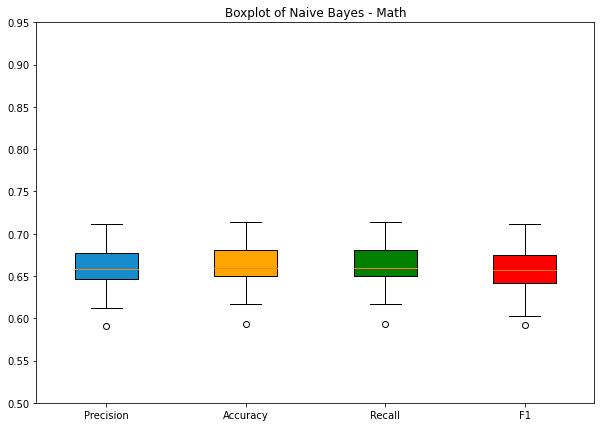

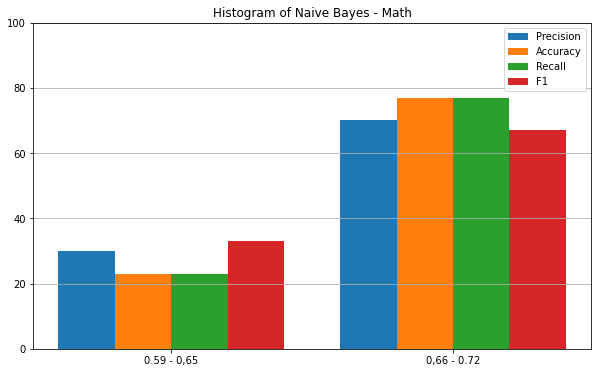

In [150]:
# Visualization

print("Naive Bayes - Math")
print ("Precision Average : ", np.mean(NMprecisionArr))
print ("Precision Range   : ", np.min(NMprecisionArr), '-', np.max(NMprecisionArr))
print ("Accuracy Average : ", np.mean(NMaccuracyArr))
print ("Accuracy Range   : ", np.min(NMaccuracyArr), '-', np.max(NMaccuracyArr))
print ("Recall Average : ", np.mean(NMrecallArr))
print ("Recall Range   : ", np.min(NMrecallArr), '-', np.max(NMrecallArr))
print ("F1 Average : ", np.mean(NMf1Arr))
print ("F1 Range   : ", np.min(NMf1Arr), '-', np.max(NMf1Arr))
print ()

VizArr = [NMprecisionArr,NMaccuracyArr,NMrecallArr,NMf1Arr]
labelXtick_1 = str(np.min(VizArr))[:4] + ' - 0,65'
labelXtick_2 = '0,66 - ' + str(np.max(VizArr)+0.01)[:4]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Naive Bayes - Math")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Precision', 'Accuracy', 'Recall', 'F1'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

fig = plt.figure(figsize =(10, 6)) 
plt.hist(VizArr,bins = [0.50,0.65,0.80], label=['Precision', 'Accuracy', 'Recall', 'F1'])
plt.xticks([0.575,0.725],labels=[labelXtick_1,labelXtick_2])
plt.ylim(ymin=0, ymax = 100)
plt.legend()
plt.grid(axis = 'y')
plt.plot()
plt.title(label="Histogram of Naive Bayes - Math")
plt.show()

In [50]:
# Naive Bayes - Writing

Predictor = availablePredictors.drop([],axis = 1)
Label = availableLabel["writing score_cat"]

NWprecisionArr = []
NWrecallArr= []
NWf1Arr = []
NWaccuracyArr = []

for i in range (100):

  X_train, X_test, y_train, y_test = train_test_split(Predictor, Label, test_size = 0.3)

  GNaiveBayes = GaussianNB()
  GNaiveBayes.fit(X_train, y_train)

  y_pred = GNaiveBayes.predict(X_test)

  precision = precision_score(y_test,y_pred, average = 'weighted', zero_division = 1)
  NWprecisionArr.append(precision)
  
  accuracy = accuracy_score(y_test,y_pred)
  NWaccuracyArr.append(accuracy)

  recall = recall_score(y_test,y_pred, average = 'weighted')
  NWrecallArr.append(recall)

  f1 = f1_score(y_test,y_pred, average='weighted')
  NWf1Arr.append(f1)

print("Naive Bayes - Writing")
print ("Precision Average : ", np.mean(NWprecisionArr))
print ("Accuracy Average : ", np.mean(NWaccuracyArr))
print ("Recall Average : ", np.mean(NWrecallArr))
print ("F1 Average : ", np.mean(NWf1Arr))
print ()

Naive Bayes - Writing
Precision Average :  0.6941352754901018
Accuracy Average :  0.6921333333333333
Recall Average :  0.6921333333333333
F1 Average :  0.6920310624170181



Naive Bayes - Writing
Precision Average :  0.6941352754901018
Precision Range   :  0.6433555555555556 - 0.7660025554168896
Accuracy Average  :  0.6921333333333333
Accuracy Range    :  0.6433333333333333 - 0.7633333333333333
Recall Average    :  0.6921333333333333
Recall Range      :  0.6433333333333333 - 0.7633333333333333
F1 Average        :  0.6920310624170181
F1 Range          :  0.6433372963403295 - 0.7632307675211966



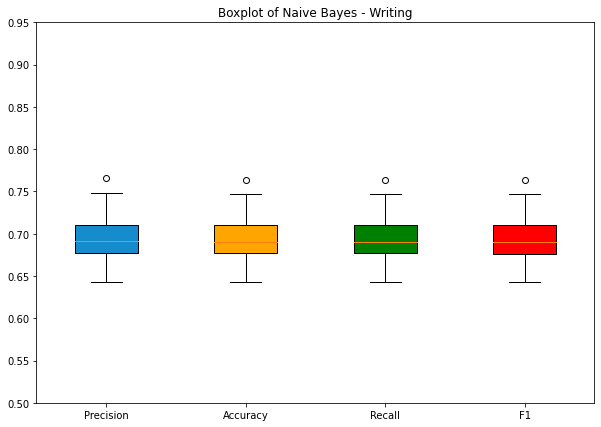

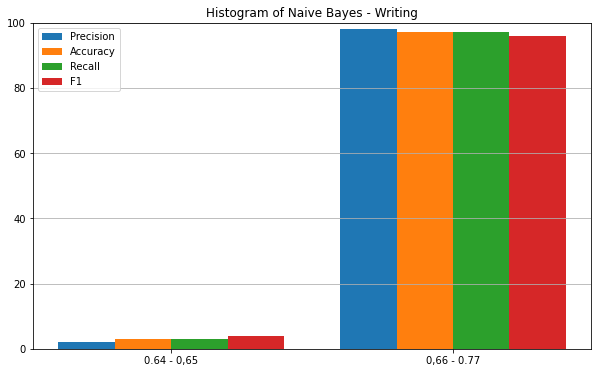

In [51]:
# Visualization

print("Naive Bayes - Writing")
print ("Precision Average : ", np.mean(NWprecisionArr))
print ("Precision Range   : ", np.min(NWprecisionArr), '-', np.max(NWprecisionArr))
print ("Accuracy Average  : ", np.mean(NWaccuracyArr))
print ("Accuracy Range    : ", np.min(NWaccuracyArr), '-', np.max(NWaccuracyArr))
print ("Recall Average    : ", np.mean(NWrecallArr))
print ("Recall Range      : ", np.min(NWrecallArr), '-', np.max(NWrecallArr))
print ("F1 Average        : ", np.mean(NWf1Arr))
print ("F1 Range          : ", np.min(NWf1Arr), '-', np.max(NWf1Arr))
print ()

VizArr = [NWprecisionArr,NWaccuracyArr,NWrecallArr,NWf1Arr]
labelXtick_1 = str(np.min(VizArr))[:4] + ' - 0,65'
labelXtick_2 = '0,66 - ' + str(np.max(VizArr)+0.01)[:4]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Naive Bayes - Writing")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Precision', 'Accuracy', 'Recall', 'F1'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

fig = plt.figure(figsize =(10, 6)) 
plt.hist(VizArr,bins = [0.50,0.65,0.80], label=['Precision', 'Accuracy', 'Recall', 'F1'])
plt.xticks([0.575,0.725],labels=[labelXtick_1,labelXtick_2])
plt.ylim(ymin=0, ymax = 100)
plt.legend()
plt.grid(axis = 'y')
plt.plot()
plt.title(label="Histogram of Naive Bayes - Writing")
plt.show()

In [52]:
# Naive Bayes - Reading

Predictor = availablePredictors.drop([],axis = 1)
Label = availableLabel["reading score_cat"]

NRprecisionArr = []
NRrecallArr= []
NRf1Arr = []
NRaccuracyArr = []

for i in range (100):

  X_train, X_test, y_train, y_test = train_test_split(Predictor, Label, test_size = 0.3)

  GNaiveBayes = GaussianNB()
  GNaiveBayes.fit(X_train, y_train)

  y_pred = GNaiveBayes.predict(X_test)

  precision = precision_score(y_test,y_pred, average = 'weighted', zero_division = 1)
  NRprecisionArr.append(precision)
  
  accuracy = accuracy_score(y_test,y_pred)
  NRaccuracyArr.append(accuracy)

  recall = recall_score(y_test,y_pred, average = 'weighted')
  NRrecallArr.append(recall)

  f1 = f1_score(y_test,y_pred, average='weighted')
  NRf1Arr.append(f1)

print("Naive Bayes - Reading")
print ("Precision Average : ", np.mean(NRprecisionArr))
print ("Accuracy Average : ", np.mean(NRaccuracyArr))
print ("Recall Average : ", np.mean(NRrecallArr))
print ("F1 Average : ", np.mean(NRf1Arr))
print ()

Naive Bayes - Reading
Precision Average :  0.6561108243696782
Accuracy Average :  0.6533999999999999
Recall Average :  0.6533999999999999
F1 Average :  0.6531510687069273



Naive Bayes - Reading
Precision Average :  0.6561108243696782
Precision Range   :  0.6101910619837166 - 0.7383064323290291
Accuracy Average  :  0.6533999999999999
Accuracy Range    :  0.6033333333333334 - 0.7366666666666667
Recall Average    :  0.6533999999999999
Recall Range      :  0.6033333333333334 - 0.7366666666666667
F1 Average        :  0.6531510687069273
F1 Range          :  0.6037962396962119 - 0.7360946811473127

0.6033333333333334 0.7383064323290291


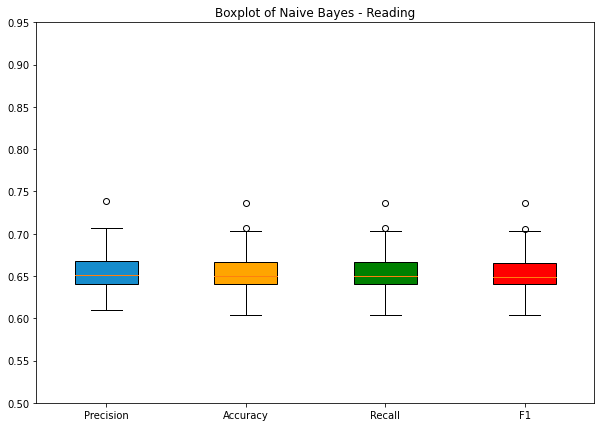

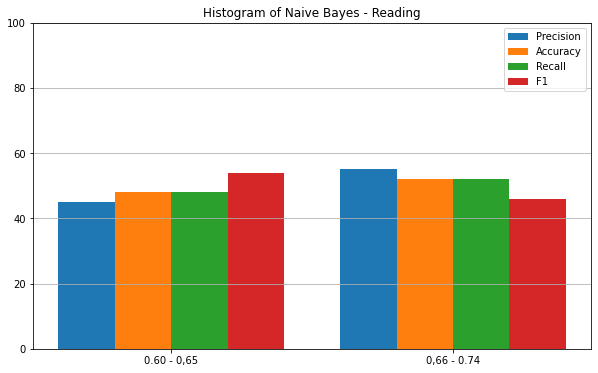

In [53]:
# Visualization

print("Naive Bayes - Reading")
print ("Precision Average : ", np.mean(NRprecisionArr))
print ("Precision Range   : ", np.min(NRprecisionArr), '-', np.max(NRprecisionArr))
print ("Accuracy Average  : ", np.mean(NRaccuracyArr))
print ("Accuracy Range    : ", np.min(NRaccuracyArr), '-', np.max(NRaccuracyArr))
print ("Recall Average    : ", np.mean(NRrecallArr))
print ("Recall Range      : ", np.min(NRrecallArr), '-', np.max(NRrecallArr))
print ("F1 Average        : ", np.mean(NRf1Arr))
print ("F1 Range          : ", np.min(NRf1Arr), '-', np.max(NRf1Arr))
print ()

VizArr = [NRprecisionArr,NRaccuracyArr,NRrecallArr,NRf1Arr]
labelXtick_1 = str(np.min(VizArr))[:4] + ' - 0,65'
labelXtick_2 = '0,66 - ' + str(np.max(VizArr)+0.01)[:4]

print (np.min(VizArr),np.max(VizArr))

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Naive Bayes - Reading")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Precision', 'Accuracy', 'Recall', 'F1'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

fig = plt.figure(figsize =(10, 6)) 
plt.hist(VizArr,bins = [0.50,0.65,0.80], label=['Precision', 'Accuracy', 'Recall', 'F1'])
plt.xticks([0.575,0.725],labels=[labelXtick_1,labelXtick_2])
plt.ylim(ymin=0, ymax = 100)
plt.legend()
plt.grid(axis = 'y')
plt.plot()
plt.title(label="Histogram of Naive Bayes - Reading")
plt.show()

In [54]:
# Naive Bayes - Reading

Predictor = availablePredictors.drop([],axis = 1)
Predictor['math score_cat'] = availableLabel['math score_cat']
Label = availableLabel["reading score_cat"]

NRXprecisionArr = []
NRXrecallArr= []
NRXf1Arr = []
NRXaccuracyArr = []

for i in range (100):

  X_train, X_test, y_train, y_test = train_test_split(Predictor, Label, test_size = 0.3)

  GNaiveBayes = GaussianNB()
  GNaiveBayes.fit(X_train, y_train)

  y_pred = GNaiveBayes.predict(X_test)

  precision = precision_score(y_test,y_pred, average = 'weighted', zero_division = 1)
  NRXprecisionArr.append(precision)
  
  accuracy = accuracy_score(y_test,y_pred)
  NRXaccuracyArr.append(accuracy)

  recall = recall_score(y_test,y_pred, average = 'weighted')
  NRXrecallArr.append(recall)

  f1 = f1_score(y_test,y_pred, average='weighted')
  NRXf1Arr.append(f1)

print("Naive Bayes - Reading Extra")
print ("Precision Average : ", np.mean(NRXprecisionArr))
print ("Accuracy Average : ", np.mean(NRXaccuracyArr))
print ("Recall Average : ", np.mean(NRXrecallArr))
print ("F1 Average : ", np.mean(NRXf1Arr))
print ()

Naive Bayes - Reading Extra
Precision Average :  0.7941888783653378
Accuracy Average :  0.7875666666666666
Recall Average :  0.7875666666666666
F1 Average :  0.7871377292855872



Naive Bayes - Reading Extra
Precision Average :  0.7941888783653378
Precision Range   :  0.7416084137993562 - 0.8326069064233317
Accuracy Average  :  0.7875666666666666
accuracy Range    :  0.73 - 0.8266666666666667
Recall Average    :  0.7875666666666666
Recall Range      :  0.73 - 0.8266666666666667
F1 Average        :  0.7871377292855872
F1 Range          :  0.7288668722378688 - 0.8268370645098828



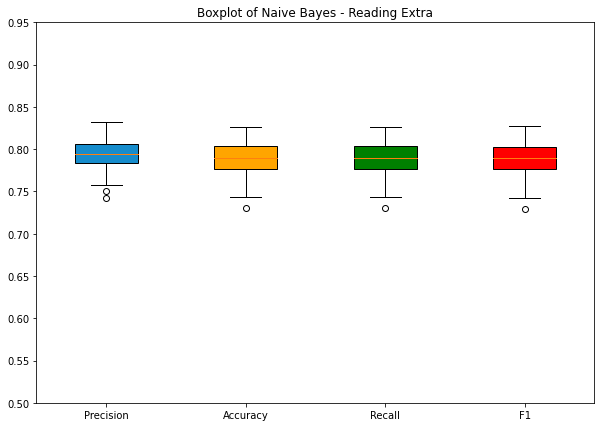

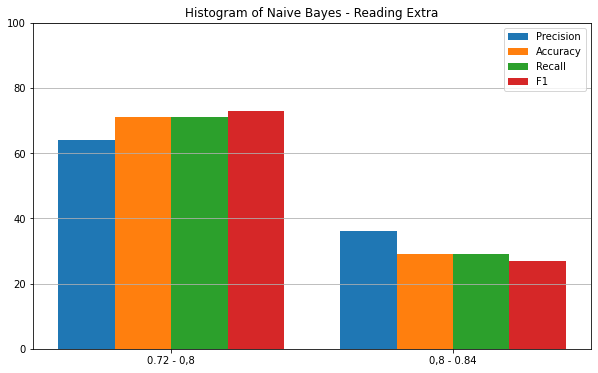

In [55]:
# Visualization

print("Naive Bayes - Reading Extra")
print ("Precision Average : ", np.mean(NRXprecisionArr))
print ("Precision Range   : ", np.min(NRXprecisionArr), '-', np.max(NRXprecisionArr))
print ("Accuracy Average  : ", np.mean(NRXaccuracyArr))
print ("accuracy Range    : ", np.min(NRXaccuracyArr), '-', np.max(NRXaccuracyArr))
print ("Recall Average    : ", np.mean(NRXrecallArr))
print ("Recall Range      : ", np.min(NRXrecallArr), '-', np.max(NRXrecallArr))
print ("F1 Average        : ", np.mean(NRXf1Arr))
print ("F1 Range          : ", np.min(NRXf1Arr), '-', np.max(NRXf1Arr))
print ()

VizArr = [NRXprecisionArr,NRXaccuracyArr,NRXrecallArr,NRXf1Arr]
labelXtick_1 = str(np.min(VizArr))[:4] + ' - 0,8'
labelXtick_2 = '0,8 - ' + str(np.max(VizArr)+0.01)[:4]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Naive Bayes - Reading Extra")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Precision', 'Accuracy', 'Recall', 'F1'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

fig = plt.figure(figsize =(10, 6)) 
plt.hist(VizArr,bins = [0.70,0.8,0.90], label=['Precision', 'Accuracy', 'Recall', 'F1'])
plt.xticks([0.75,0.85],labels=[labelXtick_1,labelXtick_2])
plt.ylim(ymin=0, ymax = 100)
plt.legend()
plt.grid(axis = 'y')
plt.plot()
plt.title(label="Histogram of Naive Bayes - Reading Extra")
plt.show()

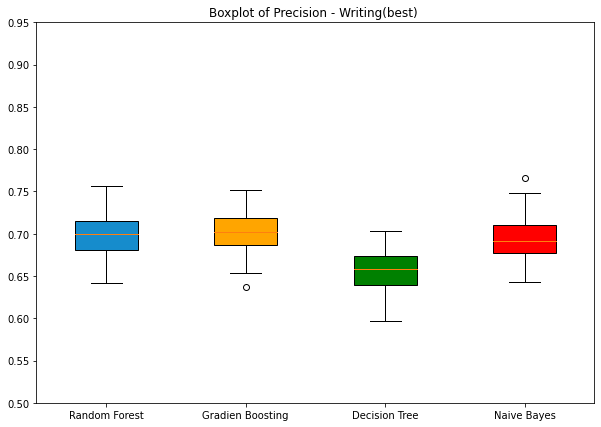

In [152]:

VizArr = [RWprecisionArr,GWprecisionArr,DWprecisionArr,NWprecisionArr]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Precision - Writing(best) ")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Random Forest', 'Gradien Boosting', 'Decision Tree', 'Naive Bayes'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

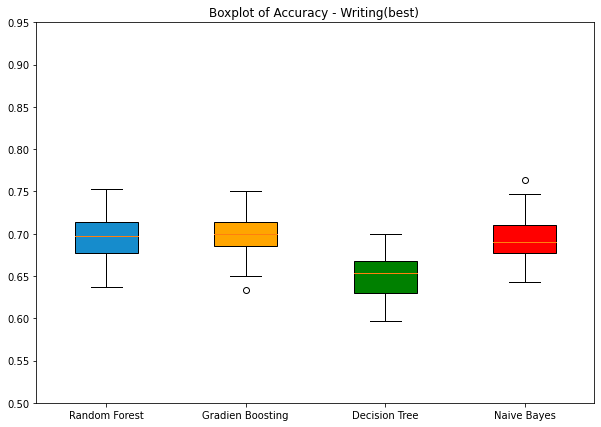

In [153]:
VizArr = [RWaccuracyArr,GWaccuracyArr,DWaccuracyArr,NWaccuracyArr]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Accuracy - Writing(best) ")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Random Forest', 'Gradien Boosting', 'Decision Tree', 'Naive Bayes'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

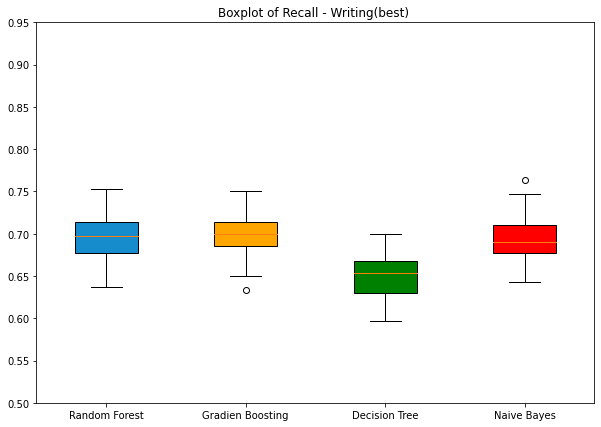

In [154]:
VizArr = [RWrecallArr,GWrecallArr,DWrecallArr,NWrecallArr]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of Recall - Writing(best) ")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Random Forest', 'Gradien Boosting', 'Decision Tree', 'Naive Bayes'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 

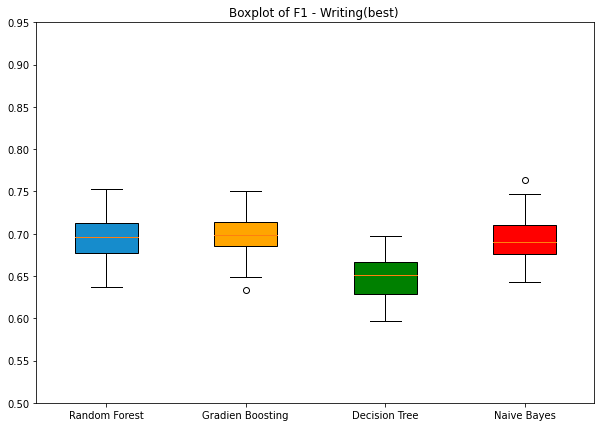

In [155]:
VizArr = [RWf1Arr,GWf1Arr,DWf1Arr,NWf1Arr]

fig = plt.figure(figsize =(10, 7)) 
plt.title(label="Boxplot of F1 - Writing(best) ")
box = plt.boxplot(VizArr, patch_artist=True)
plt.ylim(0.5, 0.95)
plt.xticks([1, 2, 3, 4], ['Random Forest', 'Gradien Boosting', 'Decision Tree', 'Naive Bayes'])

colors = ['#168ccc','orange', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show() 